In [19]:
# Setup for packages and environment
print("Setting up required packages...")

# List of required packages
required_packages = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn',
    'nltk',
    'torch',
    'gdown',        # For Google Drive downloads
    'kagglehub',    # For Kaggle datasets
    'spellchecker'  # If used in your NLP pipeline
]

# Install all required packages
import sys
import subprocess

def install_package(package):
    try:
        print(f"Checking {package}...")
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Successfully installed {package}")

# Special case for torch - check for CUDA support
try:
    import torch
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
except ImportError:
    print("Installing PyTorch...")
    # Install the appropriate version based on CUDA availability
    try:
        import google.colab
        # We're in Colab - install PyTorch with CUDA support
        !pip install torch
    except ImportError:
        # Local environment - install CPU version as fallback
        subprocess.check_call([sys.executable, "-m", "pip", "install", "torch"])
    print("PyTorch installed")

# Install remaining packages
for package in required_packages:
    if package != 'torch':  # Skip torch as we handled it specially
        install_package(package)

# Download required NLTK data
import nltk
try:
    nltk.data.find('tokenizers/punkt')
    print("NLTK punkt already downloaded")
except LookupError:
    print("Downloading NLTK punkt...")
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
    print("NLTK stopwords already downloaded")
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')

Setting up required packages...
PyTorch version: 2.6.0+cpu
CUDA available: False
Checking numpy...
Checking pandas...
Checking matplotlib...
Checking seaborn...
Checking scikit-learn...
Installing scikit-learn...
Checking nltk...
Checking gdown...
Checking kagglehub...
Installing kagglehub...
Checking spellchecker...
NLTK punkt already downloaded
NLTK stopwords already downloaded


In [20]:
# Setup code to make the project runnable in Google Colab
import os
import sys
import shutil
from google.colab import files

# Check if we're running in Colab
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Setup environment for dataset files
if is_colab():
    print("Setting up environment for CST3133 coursework...")

    # Create content directory if it doesn't exist
    if not os.path.exists('content'):
        os.makedirs('content')
        print("Created 'content' directory")

    # Create glove.6B directory if needed (for NLP part)
    if not os.path.exists('content/glove.6B'):
        os.makedirs('content/glove.6B')
        print("Created 'content/glove.6B' directory")

    # Define required files with direct links
    required_files = [
        {
            'path': 'content/Final_corrupted_dataset.csv',
            'name': 'Final_corrupted_dataset.csv',
            'gdrive_link': 'https://drive.google.com/file/d/1YGv4Ge29QsM3NiVLI99e5qfOaToREPXp/view?usp=sharing',
            'kaggle_dataset': 'lainguyn123/student-performance-factors',  # Original dataset
            'kaggle_filename': 'Student_performance_prediction.csv'  # Original file (clean version)
        },
        {
            'path': 'content/Fake.csv',
            'name': 'Fake.csv',
            'gdrive_link': 'https://drive.google.com/file/d/12M9SzGz0DzKiPXrMpwXlJN-bMTiX5vdx/view?usp=sharing',
            'kaggle_dataset': 'clmentbisaillon/fake-and-real-news-dataset',
            'kaggle_filename': 'Fake.csv'
        },
        {
            'path': 'content/True.csv',
            'name': 'True.csv',
            'gdrive_link': 'https://drive.google.com/file/d/1D_4U0G-cnEQOlNcKbvbKdftlGGJrvRuK/view?usp=sharing',
            'kaggle_dataset': 'clmentbisaillon/fake-and-real-news-dataset',
            'kaggle_filename': 'True.csv'
        }
    ]

    # GloVe file info
    glove_info = {
        'path': 'content/glove.6B/glove.6B.100d.txt',
        'name': 'glove.6B.100d.txt',
        'gdrive_link': 'https://drive.google.com/file/d/1Htt5jVKCZA7X3Ft4tHwSUvHIStO8jSll/view?usp=sharing'
    }

    # Function to check if a file exists anywhere in current directory or subdirectories
    def find_file(filename):
        for root, dirs, files in os.walk('.'):
            if filename in files:
                return os.path.join(root, filename)
        return None

    # Function to download from a Google Drive link
    def download_from_gdrive_link(drive_link, destination):
        print(f"Attempting to download from Google Drive link...")
        try:
            # Extract file ID from the link
            file_id = drive_link.split('/d/')[1].split('/view')[0]

            # Install gdown if not available
            try:
                import gdown
            except ImportError:
                print("Installing gdown...")
                !pip install -q gdown
                import gdown

            # Create the parent directory if it doesn't exist
            parent_dir = os.path.dirname(destination)
            if not os.path.exists(parent_dir):
                os.makedirs(parent_dir)

            # Download the file using gdown
            output = !gdown --id {file_id} -O {destination} 2>&1

            # Check if download was successful
            if os.path.exists(destination) and os.path.getsize(destination) > 0:
                print(f"Successfully downloaded to {destination}")
                return True
            else:
                print(f"Failed to download: {' '.join(output)}")
                return False

        except Exception as e:
            print(f"Google Drive download failed: {e}")
            return False

    # Function to download from Kaggle
    def download_from_kaggle(dataset_name, file_name, destination):
        print(f"Attempting to download {file_name} from Kaggle dataset {dataset_name}...")
        try:
            # First check if kagglehub is installed
            try:
                import kagglehub
            except ImportError:
                print("Installing kagglehub...")
                !pip install -q kagglehub
                import kagglehub

            # Try downloading with kagglehub
            try:
                path = kagglehub.dataset_download(dataset_name)
                source_path = os.path.join(path, file_name)

                if os.path.exists(source_path):
                    parent_dir = os.path.dirname(destination)
                    if not os.path.exists(parent_dir):
                        os.makedirs(parent_dir)

                    shutil.copy(source_path, destination)
                    print(f"Successfully downloaded {file_name} to {destination}")
                    return True
                else:
                    print(f"File {file_name} not found in downloaded dataset")
                    return False

            except Exception as e:
                print(f"Error with kagglehub: {e}")

                # Alternative: Try using kaggle API
                print("Trying kaggle API as fallback...")
                try:
                    # Check if kaggle is installed
                    try:
                        import kaggle
                    except ImportError:
                        print("Installing kaggle...")
                        !pip install -q kaggle

                    # Check if kaggle.json exists
                    if not os.path.exists('/root/.kaggle/kaggle.json'):
                        print("Kaggle API credentials required.")
                        print("Please upload your kaggle.json file")
                        uploaded = files.upload()

                        if 'kaggle.json' in uploaded:
                            os.makedirs('/root/.kaggle', exist_ok=True)
                            shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
                            !chmod 600 /root/.kaggle/kaggle.json
                            print("Kaggle credentials configured")
                        else:
                            print("Kaggle credentials not provided. Cannot download using Kaggle API.")
                            return False

                    # Download the dataset
                    !kaggle datasets download -d {dataset_name} --unzip

                    # Find the file in the extracted folder
                    for root, dirs, files in os.walk('.'):
                        if file_name in files:
                            file_path = os.path.join(root, file_name)
                            parent_dir = os.path.dirname(destination)
                            if not os.path.exists(parent_dir):
                                os.makedirs(parent_dir)

                            shutil.copy(file_path, destination)
                            print(f"Successfully downloaded {file_name} to {destination}")
                            return True

                    print(f"File {file_name} not found in downloaded dataset")
                    return False

                except Exception as e2:
                    print(f"Error with kaggle API: {e2}")
                    return False

        except Exception as e3:
            print(f"Download failed: {e3}")
            return False

    # Process each required file
    for file_info in required_files:
        path = file_info['path']
        name = file_info['name']

        # Step 0: Check if file already exists at the correct location
        if os.path.exists(path):
            print(f"{name} already exists at {path}")
            continue

        # Step 1: Check if file exists elsewhere in the project
        existing_file = find_file(name)
        if existing_file and existing_file != path:
            print(f"Found {name} at {existing_file}, moving to {path}")

            # Create parent directory if needed
            parent_dir = os.path.dirname(path)
            if not os.path.exists(parent_dir):
                os.makedirs(parent_dir)

            # Copy file to the correct location
            shutil.copy(existing_file, path)
            print(f"Copied {name} to {path}")
            continue

        # Step 2: Try direct download from shared Google Drive link
        success = download_from_gdrive_link(file_info['gdrive_link'], path)

        # Step 3: If Google Drive fails, prompt for upload
        if not success:
            print(f"\nCould not download {name} from Google Drive.")
            print(f"Please upload {name} when prompted.")

            uploaded = files.upload()

            if name in uploaded:
                # Create parent directory if needed
                parent_dir = os.path.dirname(path)
                if not os.path.exists(parent_dir):
                    os.makedirs(parent_dir)

                # Move the file to the correct location
                shutil.move(name, path)
                print(f"Moved {name} to {path}")
                success = True
            else:
                print(f"Warning: {name} was not uploaded.")

        # Step 4: For corrupted dataset specifically, try downloading the original from Kaggle
        if not success and name == 'Final_corrupted_dataset.csv':
            print("\nAttempting to download the original Student Performance dataset from Kaggle as fallback...")

            # The original dataset might have a different filename on Kaggle
            temp_file = 'temp_kaggle_dataset.csv'

            kaggle_success = download_from_kaggle(
                file_info['kaggle_dataset'],
                file_info['kaggle_filename'],
                temp_file
            )

            if kaggle_success:
                print("Note: Downloaded the original clean dataset. This is not the corrupted version used in the assignment.")
                print("The code will still run but may behave differently than intended.")

                # Copy the file to the expected location with the expected name
                parent_dir = os.path.dirname(path)
                if not os.path.exists(parent_dir):
                    os.makedirs(parent_dir)

                shutil.copy(temp_file, path)
                print(f"Copied and renamed original dataset to {path}")
                success = True

        # Final warning if all methods failed
        if not success:
            print(f"WARNING: Failed to obtain {name}. The code may not run correctly.")

    # Handle GloVe embeddings (for NLP part)
    glove_file = glove_info['path']
    if not os.path.exists(glove_file):
        print("\nSetting up GloVe embeddings for the NLP part...")

        # Step 1: Check if GloVe file exists elsewhere in the project
        existing_glove = find_file(glove_info['name'])
        if existing_glove and existing_glove != glove_file:
            print(f"Found {glove_info['name']} at {existing_glove}, moving to {glove_file}")

            # Create parent directory if needed
            parent_dir = os.path.dirname(glove_file)
            if not os.path.exists(parent_dir):
                os.makedirs(parent_dir)

            # Copy file to the correct location
            shutil.copy(existing_glove, glove_file)
            print(f"Copied {glove_info['name']} to {glove_file}")
            glove_success = True
        else:
            # Step 2: Try downloading from shared Google Drive
            glove_success = download_from_gdrive_link(glove_info['gdrive_link'], glove_file)

            # Step 3: If that fails, try direct download from Stanford
            if not glove_success:
                print("Attempting to download GloVe embeddings from Stanford...")
                try:
                    !wget -q -O glove.6B.zip http://nlp.stanford.edu/data/glove.6B.zip
                    if os.path.exists('glove.6B.zip'):
                        parent_dir = os.path.dirname(glove_file)
                        if not os.path.exists(parent_dir):
                            os.makedirs(parent_dir)

                        !unzip -q glove.6B.zip -d content/glove.6B
                        !rm glove.6B.zip
                        if os.path.exists(glove_file):
                            print("Successfully downloaded and extracted GloVe embeddings")
                            glove_success = True
                        else:
                            print("GloVe files were extracted but couldn't find the specific file needed")
                            glove_success = False
                    else:
                        raise Exception("Download failed")
                except Exception as e:
                    print(f"Could not download GloVe embeddings: {e}")
                    glove_success = False

            # Step 4: If both fail, prompt for upload
            if not glove_success:
                print("Please upload glove.6B.100d.txt when prompted")
                uploaded = files.upload()

                if glove_info['name'] in uploaded:
                    # Move the file to the correct location
                    parent_dir = os.path.dirname(glove_file)
                    if not os.path.exists(parent_dir):
                        os.makedirs(parent_dir)

                    shutil.move(glove_info['name'], glove_file)
                    print(f"Moved {glove_info['name']} to {glove_file}")
                    glove_success = True
                else:
                    print("Warning: GloVe embeddings not uploaded.")

            # Final warning if all methods failed
            if not glove_success:
                print("WARNING: Failed to obtain GloVe embeddings. The NLP part may not work correctly.")
    else:
        print(f"GloVe embeddings already exist at {glove_file}")

    print("\nEnvironment setup complete. Your code should now run with the correct file paths.")
else:
    print("Not running in Colab. Using local paths.")

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
############################################
# 1. IMPORT LIBRARIES & MOUNT (if needed)
############################################

import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 100

We begin by importing the essential libraries used throughout the project:

pandas and numpy for data manipulation and numerical operations.
random for picking random values or random choices if needed.
seaborn and matplotlib for data visualization.


In [ ]:
############################################
# 2. LOAD DATASET
############################################

missing_values = [
    "Not Available", "N/A", "na", "NaN", "nan",
    "NULL", "Unknown", "--", "not available",
    "unknown", "null", ""
]

df = pd.read_csv("Final_corrupted_dataset.csv", na_values=missing_values)

print("Initial dataset shape:", df.shape)
# df.head(10)


We define a list of missing_values placeholders, such as "Not Available", "N/A", and "". This ensures that when pandas reads the CSV, any cell matching these strings becomes a NaN (missing value).
We specify the file_path to our CSV.
pd.read_csv loads the data into a DataFrame df. The parameter na_values=missing_values tells pandas to treat those strings as missing.
We then print the initial shape of the DataFrame to see how many rows/columns we have, and df.head(10) shows the first 10 rows so we can quickly inspect what the raw data looks like.

In [ ]:
############################################
# 3. REMOVE DUPLICATES
############################################

df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print("After removing duplicates, shape =", df.shape)


drop_duplicates scans the DataFrame for any exact duplicate rows and removes them. This prevents counting the same record multiple times.
reset_index(drop=True) reassigns a new integer index from 0 to len(df)-1.
We print the new shape to confirm how many rows remain after duplicates are removed. This helps keep the data unique and consistent.

In [ ]:
############################################
# 4. QUICK INSPECTION
############################################

print("\n--- INFO ---")
df.info()

print("\n--- DESCRIBE (include='all') ---")
display(df.describe(include='all'))

print("\n--- SAMPLE ROWS ---")
display(df.sample(5))


df.info(): Summarizes each column’s data type, the number of non-null values, and the overall memory usage. This helps identify columns with missing data or incorrect data types.
df.describe(include='all'): Gives a statistical summary for all columns—both numeric (mean, std, min, max) and categorical (count, unique, top, freq).
df.sample(5): Displays 5 random rows so we can see the variety of entries. This can reveal unexpected placeholders or anomalies that might not appear in the first few rows.

In [13]:
############################################
# 5. CONVERT WRITTEN-OUT NUMBERS TO DIGITS
############################################

word_to_number_dict = {
    "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4,
    "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
    "ten": 10, "eleven": 11, "twelve": 12, "thirteen": 13,
    "fourteen": 14, "fifteen": 15, "sixteen": 16,
    "seventeen": 17, "eighteen": 18, "nineteen": 19
}
tens_dict = {
    "twenty": 20, "thirty": 30, "forty": 40, "fifty": 50,
    "sixty": 60, "seventy": 70, "eighty": 80, "ninety": 90
}

def words_to_numbers(value):
    """Convert English words (like 'sixty-five') to an integer if possible."""
    if not isinstance(value, str):
        return value  # If it's already numeric or NaN, return as-is

    word = value.strip().lower()
    # Direct 0-19
    if word in word_to_number_dict:
        return word_to_number_dict[word]
    # Direct tens (20,30,...90)
    if word in tens_dict:
        return tens_dict[word]
    # Compound numbers "twenty-three", "ninety-nine", etc.
    if "-" in word:
        parts = word.split("-")
        if len(parts) == 2:
            part1, part2 = parts
            if part1 in tens_dict and part2 in word_to_number_dict:
                return tens_dict[part1] + word_to_number_dict[part2]
    # Not recognized => return original
    return value

# Define numeric columns that might have textual numbers
possible_text_nums = [
    "Hours_Studied", "Sleep_Hours", "Previous_Scores",
    "Tutoring_Sessions", "Physical_Activity", "Exam_Score"
]

# Converting
for col in possible_text_nums:
    if col in df.columns:
        df[col] = df[col].apply(words_to_numbers)


Some numeric columns may contain textual representations (e.g., "sixty-five") that should be actual numbers (65).
words_to_numbers tries to convert words like "twenty-three" into the correct integer. If it can’t, it returns the original value.
We apply this function only to columns we suspect might have textual numeric data (like Hours_Studied, Sleep_Hours, etc.).
This step ensures we don’t have strings like "eight" in numeric columns.

In [15]:
############################################
# 6. FORCE NUMERIC COLUMNS
############################################

# We expect these columns to be numeric
numeric_cols = [
    "Hours_Studied", "Attendance", "Sleep_Hours",
    "Previous_Scores", "Tutoring_Sessions",
    "Physical_Activity", "Exam_Score"  # If it exists
]

for col in numeric_cols:
    if col in df.columns:
        # Convert to numeric, coerce to NaN if unconvertible
        df[col] = pd.to_numeric(df[col], errors='coerce')


We define numeric_cols as columns that we want to be numeric.
pd.to_numeric with errors='coerce' attempts to convert each entry to a float. If it can’t (e.g., leftover text), it becomes NaN.
This step is critical if the dataset has inconsistent types. By the end, these columns are guaranteed to be numeric or missing.

In [17]:
############################################
# 7. FIX INCONSISTENT STRINGS (e.g. 'low' -> 'Low')
############################################

df.replace({"low": "Low", "high": "High", "medium": "Medium"}, inplace=True)

# Also unify 'Male'/'Female' if needed
# More robust approach below with mapping


If we see columns containing strings like "low", "Low", or "LOW", we unify them to a standard.
This line specifically addresses “low/high/medium” cases, ensuring consistent capitalization.
We might have already handled them in a later step, but doing it here can help if any columns remain as strings.

In [19]:
############################################
# 8. HANDLE MISSING VALUES
############################################

# (A) Numeric columns => fill with median
for col in numeric_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# (B) Categorical columns => fill with mode
# Define some likely categorical columns
cat_cols = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home",
    "Gender"
]

In [21]:
# Define categorical replacements
categorical_replacements = {
    "Parental_Involvement": ["Low", "Medium", "High"],
    "Access_to_Resources": ["Low", "Medium", "High"],
    "Extracurricular_Activities": ["Yes", "No"],
    "Motivation_Level": ["Low", "Medium", "High"],
    "Internet_Access": ["Yes"],
    "Family_Income": ["Low", "Medium"],
    "Teacher_Quality": ["Low", "Medium", "High"],
    "School_Type": ["Public"],
    "Peer_Influence": ["Positive", "Neutral", "Negative"],
    "Learning_Disabilities": ["No"],
    "Parental_Education_Level": ["High School", "College", "Post Graduate"],
    "Distance_from_Home": ["Near", "Moderate"],
    "Gender": ["Male", "Female"]
}

# Fill missing categorical values randomly
for col, choices in categorical_replacements.items():
    if col in df.columns:
        df[col].fillna(random.choice(choices), inplace=True)

For numeric columns, we compute the median and fill any NaN with that median. This is robust to outliers and ensures no numeric column remains missing.
For categorical columns, we pick the mode (most frequent category) and fill missing values with that. This is a simple approach that ensures each category remains consistent.
Family_Income: If we discovered that the entire column was missing, we fill it with a default numeric value (e.g., 2.0, signifying “Medium”). If only partial data is missing, we fill with the median.

In [25]:
############################################
# 9. NORMALIZE CATEGORICAL STRINGS
############################################

def normalize_strings(series, valid_values):
    """ Convert series to lowercase, strip spaces, map to valid_values if found. """
    series = series.astype(str).str.strip().str.lower()
    mapping = {v.lower(): v for v in valid_values}
    return series.map(mapping).fillna(series)  # if not found, keep original

# For "Low"/"Medium"/"High" columns:
lmh_cols = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Teacher_Quality", "Family_Income"]
for col in lmh_cols:
    if col in df.columns:
        df[col] = normalize_strings(df[col], ["Low", "Medium", "High"])

# For yes/no columns:
yn_cols = ["Internet_Access", "Extracurricular_Activities", "Learning_Disabilities"]
for col in yn_cols:
    if col in df.columns:
        df[col] = normalize_strings(df[col], ["Yes", "No"])

# For "School_Type" => "Public"/"Private"
if "School_Type" in df.columns:
    df["School_Type"] = normalize_strings(df["School_Type"], ["Public", "Private"])

# For "Peer_Influence" => "Positive"/"Neutral"/"Negative"
if "Peer_Influence" in df.columns:
    df["Peer_Influence"] = normalize_strings(df["Peer_Influence"], ["Positive", "Neutral", "Negative"])

# For "Distance_from_Home" => "Near"/"Moderate"/"Far"
if "Distance_from_Home" in df.columns:
    df["Distance_from_Home"] = normalize_strings(df["Distance_from_Home"], ["Near", "Moderate", "Far"])

# For "Parental_Education_Level" => "High School", "College", "Postgraduate"
if "Parental_Education_Level" in df.columns:
    df["Parental_Education_Level"] = normalize_strings(df["Parental_Education_Level"],["High School", "College", "Post Graduate", "Postgraduate"])

# For "Gender" => "Male"/"Female"
if "Gender" in df.columns:
    df["Gender"] = normalize_strings(df["Gender"], ["Male", "Female"])

#Print all values in unique values in each column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Hours_Studied
[20. 19. 24. 29. 25. 17. 23. 21.  9. 10. 14. 15. 12. 11. 13. 22. 16. 18.
 31.  8. 26.  4. 35. 27. 28. 33. 36. 43. 34.  1. 30.  7. 32. 38.  5.  3.
  2.  6. 39. 37. 44.]

Column: Attendance
[ 84.  64.  98.  89.  92.  88.  78.  94.  80.  97.  82.  68.  60.  70.
  75.  99.  74.  65.  62.  91.  83.  90.  69.  72.  63.  61.  86.  77.
  71.  67.  87.  66.  73.  96. 100.  81.  95.  79.  85.  76.  93.]

Column: Parental_Involvement
['Low' 'Medium' 'High']

Column: Access_to_Resources
['High' 'Medium' 'Low']

Column: Extracurricular_Activities
['No' 'Yes']

Column: Sleep_Hours
[ 7.  8.  6.  9.  5.  4. 10.]

Column: Previous_Scores
[ 73.  59.  91.  98.  65.  75.  68.  50.  80.  71.  88.  97.  72.  74.
  70.  82.  58.  99.  84.  89. 100.  54.  90.  94.  51.  57.  66.  96.
  93.  56.  52.  63.  87.  81.  69.  95.  60.  79.  92.  77.  62.  85.
  64.  76.  55.  86.  61.  53.  83.  78.  67.]

Column: Motivation_Level
['Low' 'Medium' 'High']

Column: Internet_Access
['Yes' 'No']


This function takes a pandas Series and a list of valid_values (e.g., ["Low", "Medium", "High"]).
It converts everything to lowercase, strips whitespace, and tries to match them to the valid set.
If an entry matches, it’s replaced with the correct casing (e.g., “low” → “Low”).
If it doesn’t match, we leave it as-is.
We apply it to columns like Parental_Involvement, Internet_Access, etc. to ensure consistent strings.

In [27]:
############################################
# 10. MAP CATEGORIES TO NUMERIC
############################################

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_replacements.keys(), dtype=int)


For ordinal categories like “Low/Medium/High,” we choose numeric codes (0.33, 0.66, 0.99) to reflect a progression.
For yes/no columns, we use 1.0 and 0.0.
For Gender, we might pick 1.0 for “Male” and 0.0 for “Female.”
This step ensures the final dataset is entirely numeric, which is essential for many ML algorithms.

In [29]:
############################################
# 11. OPTIONAL: CLIP & SCALE NUMERIC
############################################

# Outlier clipping & standardizing 'Hours_Studied'
if "Hours_Studied" in df.columns:
    lb = np.percentile(df["Hours_Studied"], 1)
    ub = np.percentile(df["Hours_Studied"], 99)
    df["Hours_Studied"] = df["Hours_Studied"].clip(lb, ub)

    mean_val = df["Hours_Studied"].mean()
    std_val = df["Hours_Studied"].std()
    df["Hours_Studied"] = (df["Hours_Studied"] - mean_val) / std_val

# Could scale 'Sleep_Hours', 'Physical_Activity', etc.


Outlier clipping: We take the 1st and 99th percentiles of Hours_Studied and clip any values below or above that range. This reduces extreme outliers.
Standardization: We then transform it to have mean=0 and std=1, so Hours_Studied becomes easier for certain ML models to handle.
You can replicate this approach for other columns if you want uniform scaling or outlier handling across the dataset.

In [33]:
############################################
# 12. FINAL CHECK
############################################

print("\n--- FINAL df.info() ---")
df.info()

print("\n--- HEAD ---")
display(df.head(10))

# Confirm no missing values
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())

# Print all values in unique values in each column
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())



--- FINAL df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          11123 non-null  float64
 1   Attendance                             11123 non-null  float64
 2   Sleep_Hours                            11123 non-null  float64
 3   Previous_Scores                        11123 non-null  float64
 4   Tutoring_Sessions                      11123 non-null  float64
 5   Physical_Activity                      11123 non-null  float64
 6   Exam_Score                             11123 non-null  float64
 7   Parental_Involvement_High              11123 non-null  int32  
 8   Parental_Involvement_Low               11123 non-null  int32  
 9   Parental_Involvement_Medium            11123 non-null  int32  
 10  Access_to_Resources_High               11123 

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0       0.001172        84.0          7.0             73.0                0.0   
1      -0.177399        64.0          7.0             59.0                2.0   
2       0.715457        98.0          7.0             91.0                2.0   
3       1.608313        89.0          8.0             98.0                1.0   
4      -0.177399        92.0          7.0             65.0                3.0   
5      -0.177399        88.0          7.0             75.0                3.0   
6       1.608313        84.0          7.0             68.0                1.0   
7       0.894028        78.0          6.0             50.0                1.0   
8      -0.534542        94.0          6.0             80.0                0.0   
9       0.536886        98.0          7.0             71.0                0.0   

   Physical_Activity  Exam_Score  Parental_Involvement_High  \
0                3.0        67.0                          0   
1                4.0        61.0                          0   
2                4.0        67.0                          0   
3                3.0        71.0                          0   
4                4.0        70.0                          0   
5                3.0        71.0                          0   
6                2.0        67.0                          1   
7                2.0        67.0                          0   
8                1.0        69.0                          0   
9                5.0        72.0                          0   

   Parental_Involvement_Low  Parental_Involvement_Medium  ...  \
0                         1                            0  ...   
1                         1                            0  ...   
2                         0                            1  ...   
3                         1                            0  ...   
4                         0                            1  ...   
5                         0                            1  ...   
6                         0                            0  ...   
7                         1                            0  ...   
8                         0                            1  ...   
9                         0                            1  ...   

   Learning_Disabilities_No  Learning_Disabilities_Yes  \
0                         1                          0   
1                         1                          0   
2                         1                          0   
3                         1                          0   
4                         1                          0   
5                         1                          0   
6                         1                          0   
7                         1                          0   
8                         1                          0   
9                         1                          0   

   Parental_Education_Level_College  Parental_Education_Level_High School  \
0                                 0                                     1   
1                                 1                                     0   
2                                 0                                     0   
3                                 1                                     0   
4                                 1                                     0   
5                                 0                                     0   
6                                 0                                     1   
7                                 0                                     1   
8                                 1                                     0   
9                                 0                                     1   

   Parental_Education_Level_Postgraduate  Distance_from_Home_Far  \
0                                      0                       0   
1                                      0                       0   
2         


--- MISSING VALUES ---
Hours_Studied                            0
Attendance                               0
Sleep_Hours                              0
Previous_Scores                          0
Tutoring_Sessions                        0
Physical_Activity                        0
Exam_Score                               0
Parental_Involvement_High                0
Parental_Involvement_Low                 0
Parental_Involvement_Medium              0
Access_to_Resources_High                 0
Access_to_Resources_Low                  0
Access_to_Resources_Medium               0
Extracurricular_Activities_No            0
Extracurricular_Activities_Yes           0
Motivation_Level_High                    0
Motivation_Level_Low                     0
Motivation_Level_Medium                  0
Internet_Access_No                       0
Internet_Access_Yes                      0
Family_Income_High                       0
Family_Income_Low                        0
Family_Income_Medium          

df.info() once more, to confirm that columns are now the correct type (float64 or int64 for numeric, etc.) and that we have 0 missing values in the columns we’ve handled.
We display the first 10 rows to see if the transformations make sense (e.g., ordinal columns turned to numeric codes, textual columns replaced with numeric or consistent categories).
df.isnull().sum() is a final check that no columns remain with missing data.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


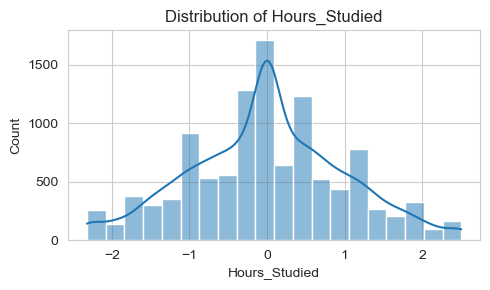

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


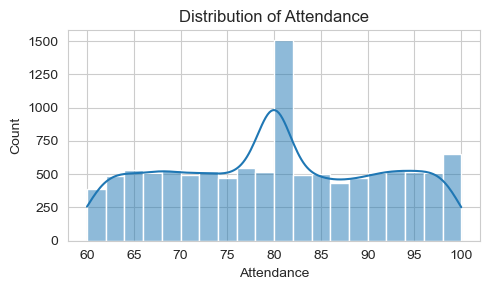

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


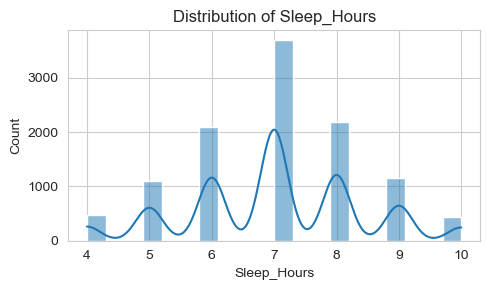

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


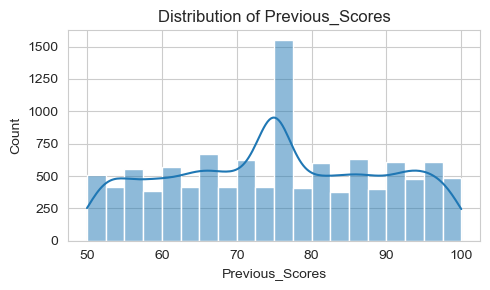

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


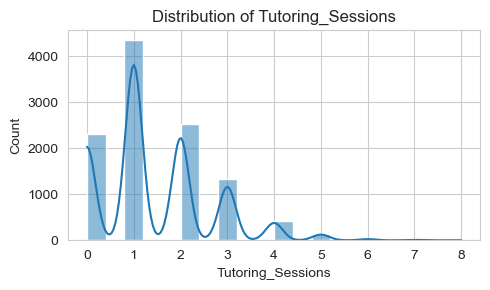

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


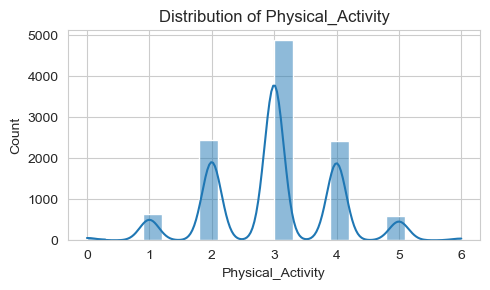

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


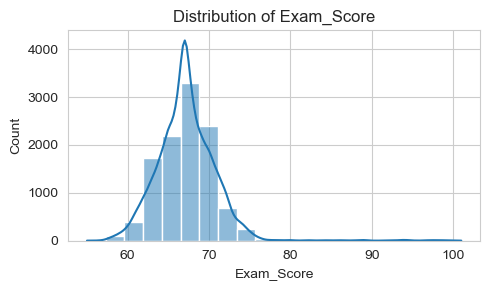

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


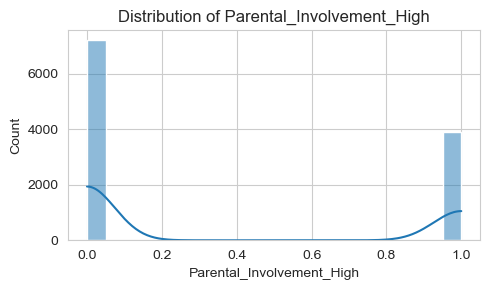

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


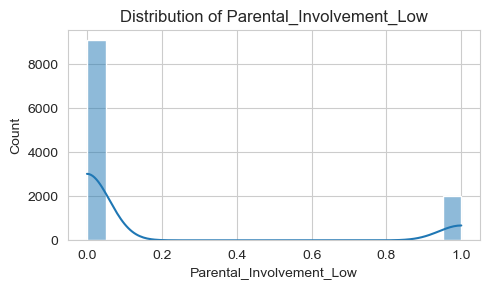

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


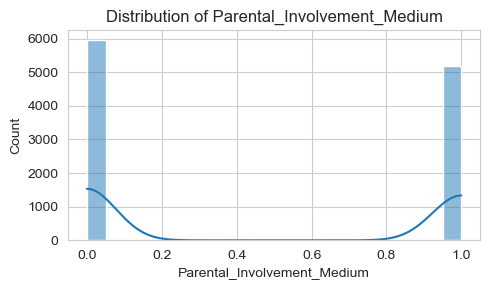

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


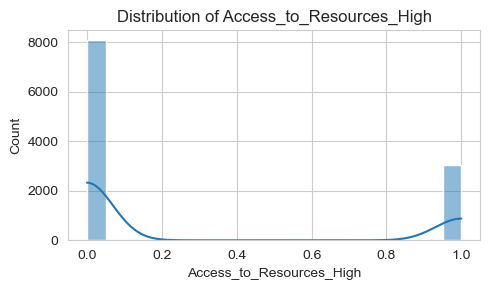

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


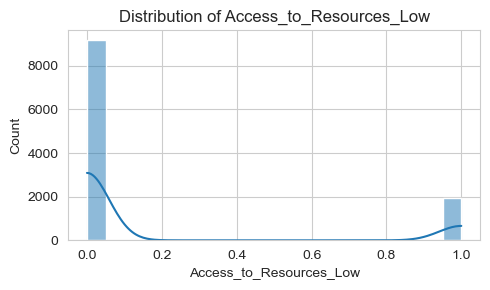

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


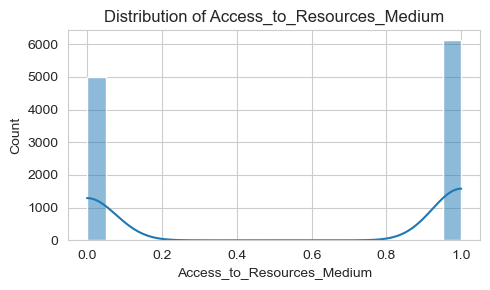

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


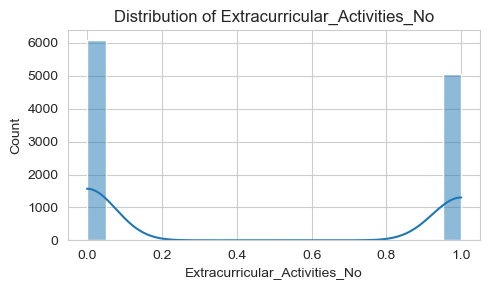

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


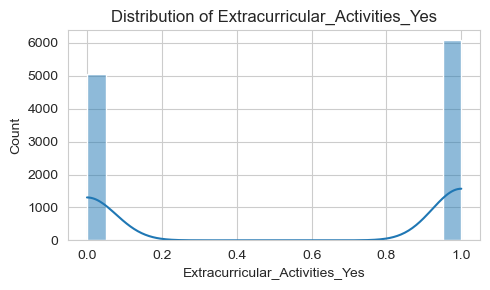

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


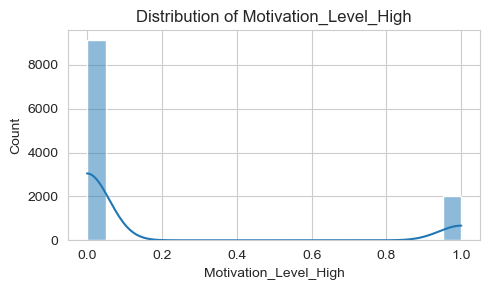

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


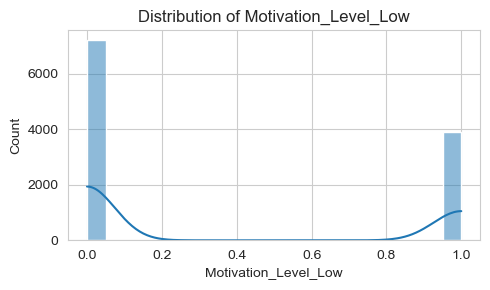

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


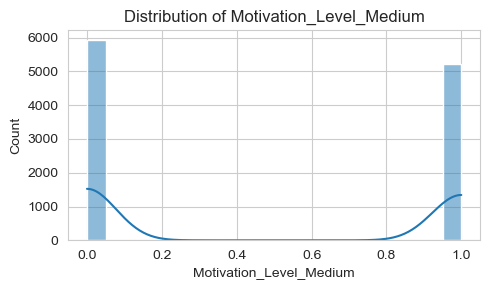

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


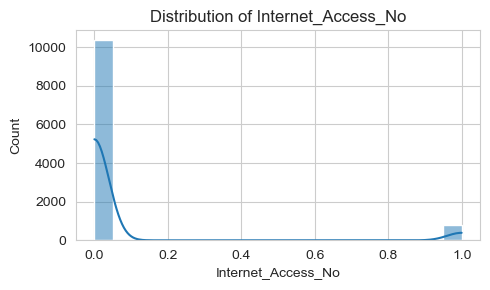

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


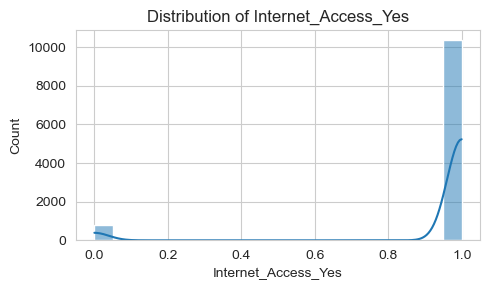

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


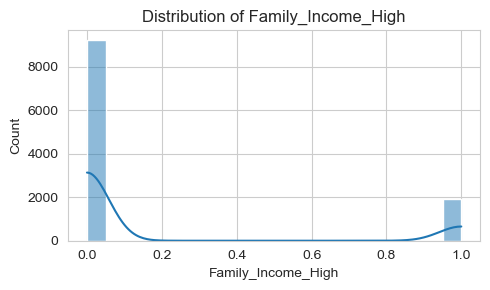

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


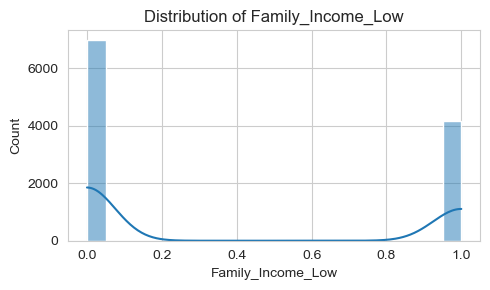

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


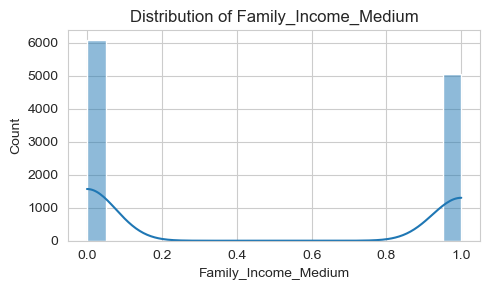

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


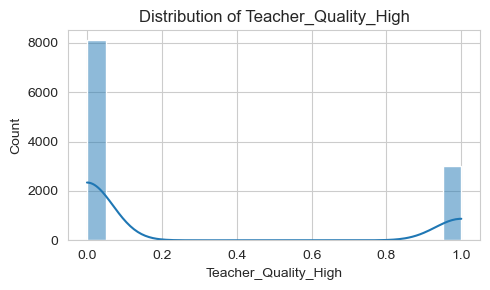

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


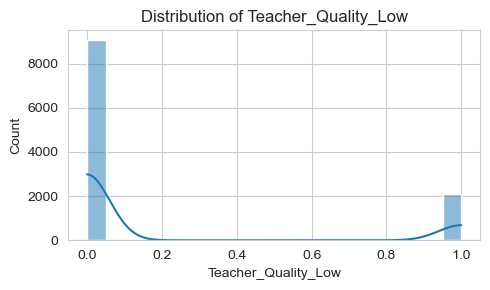

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


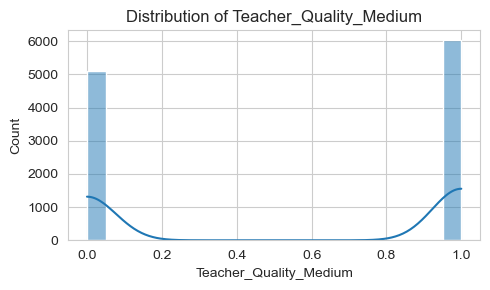

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


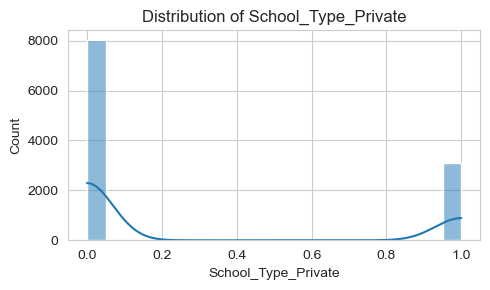

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


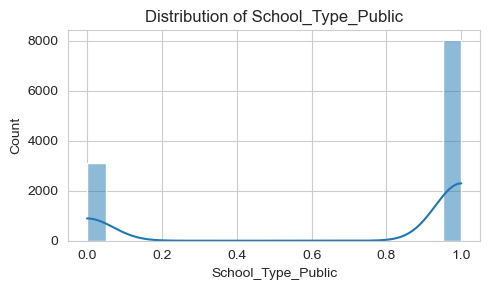

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


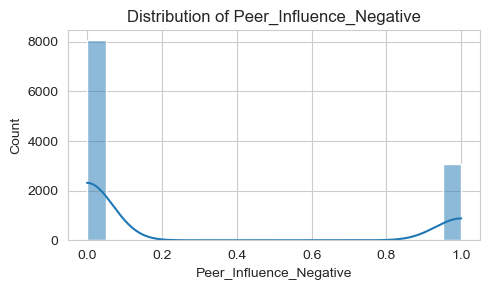

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


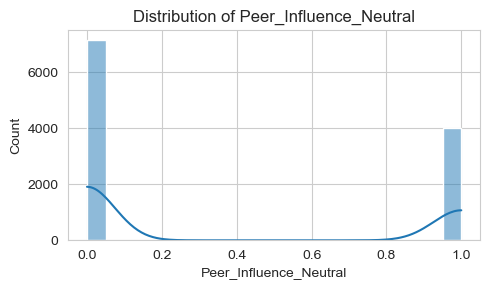

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


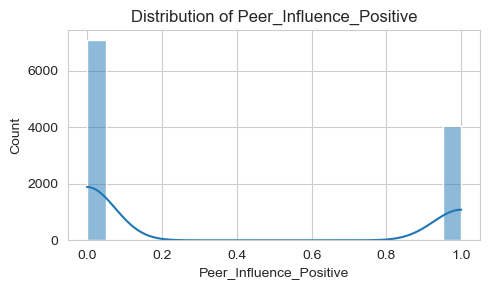

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


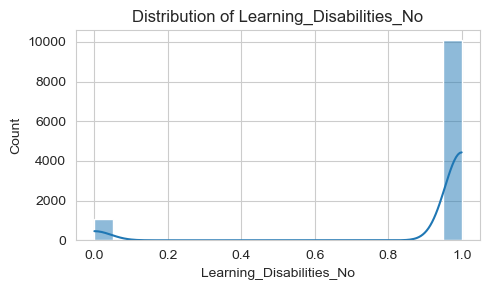

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


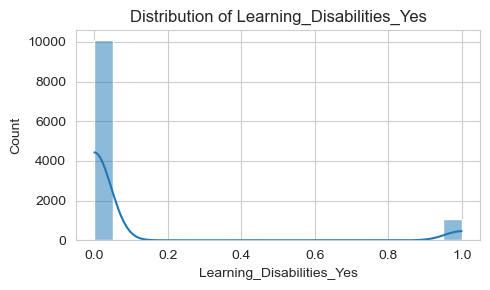

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


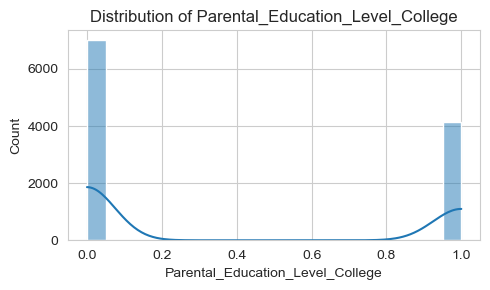

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


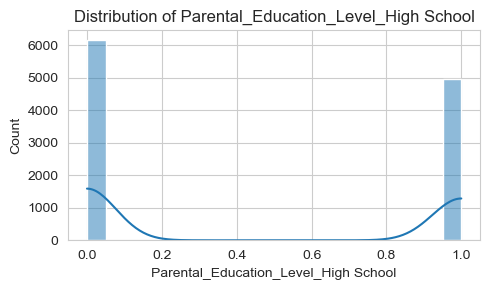

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


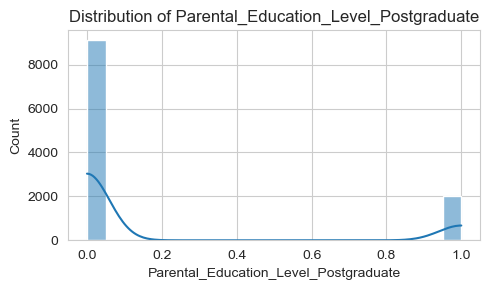

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


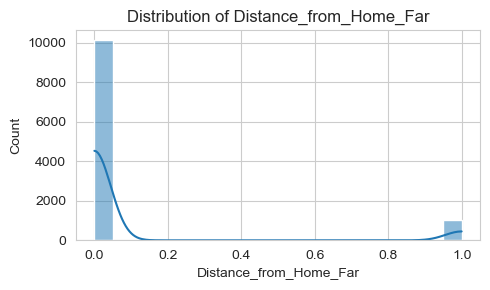

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


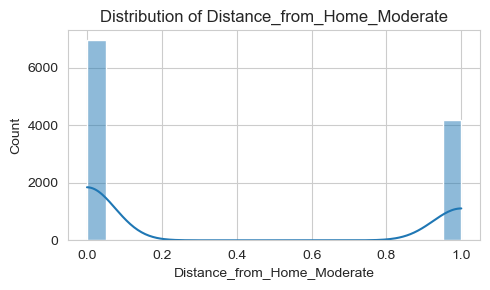

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


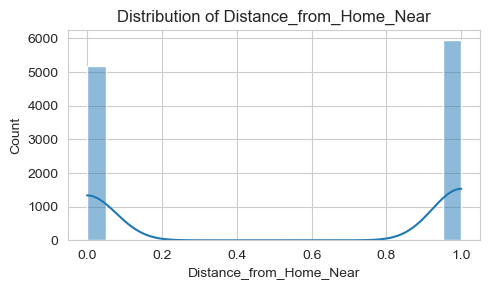

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


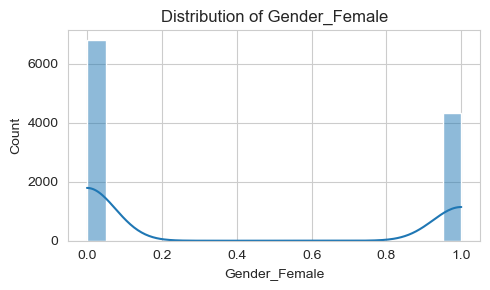

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


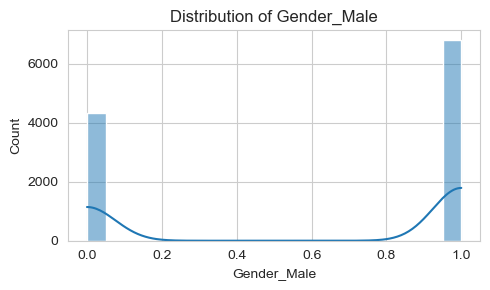

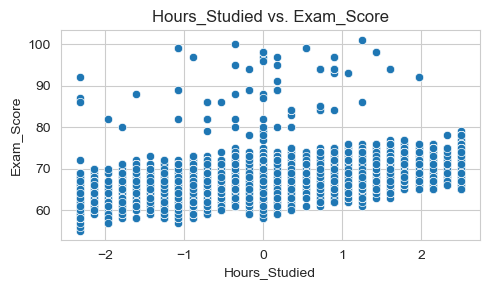

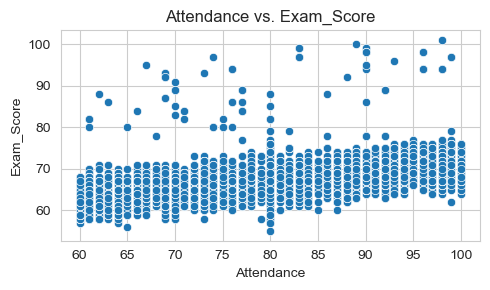

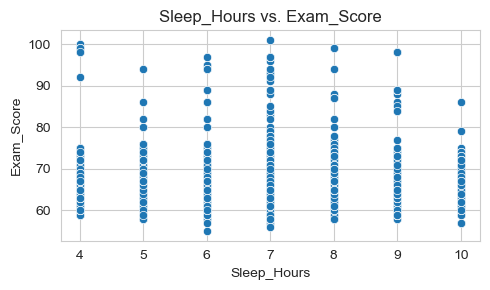

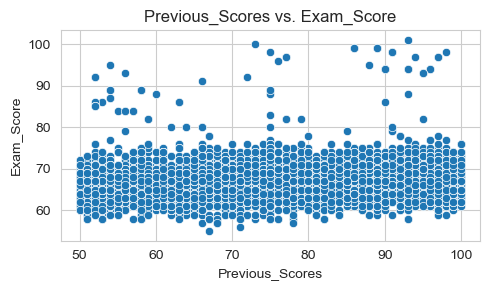

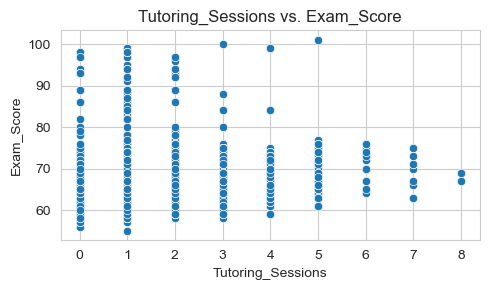

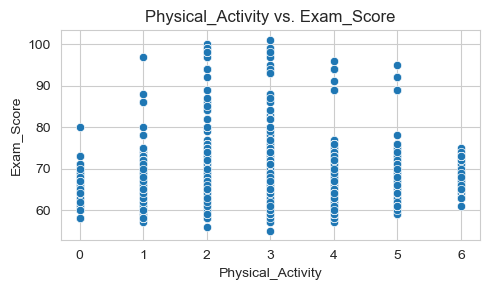

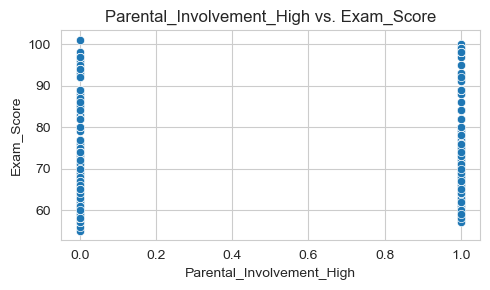

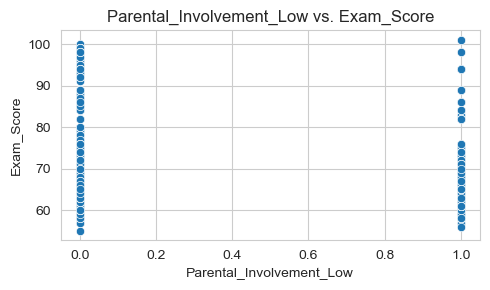

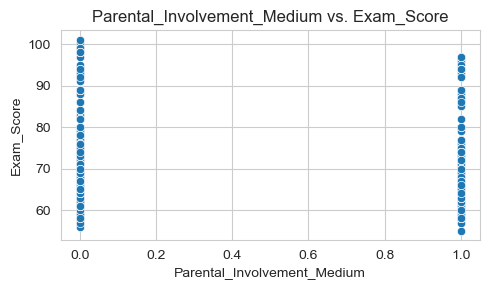

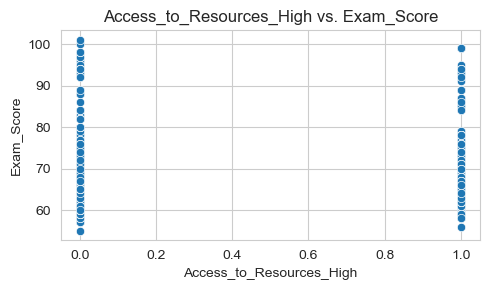

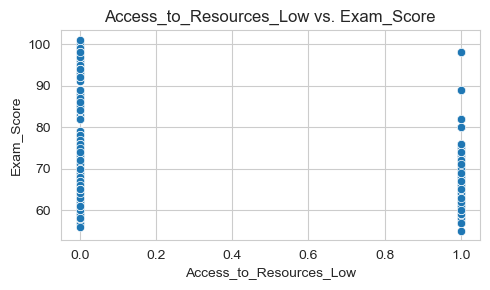

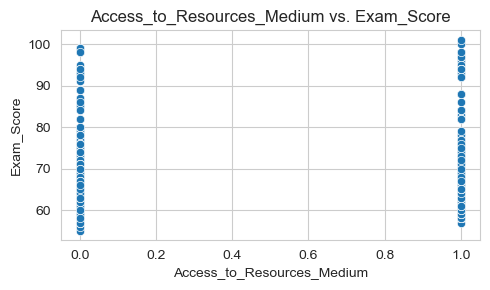

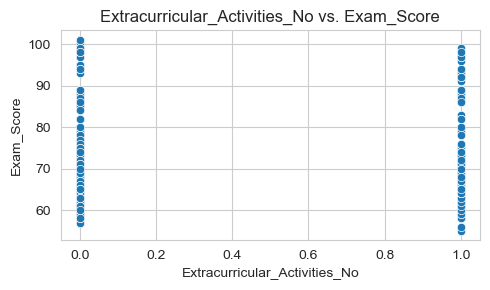

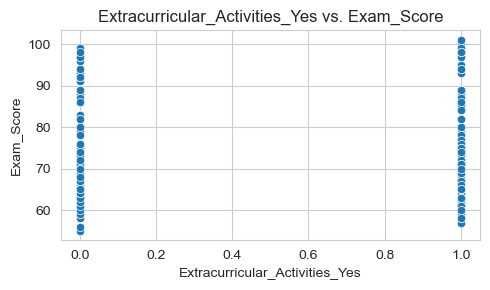

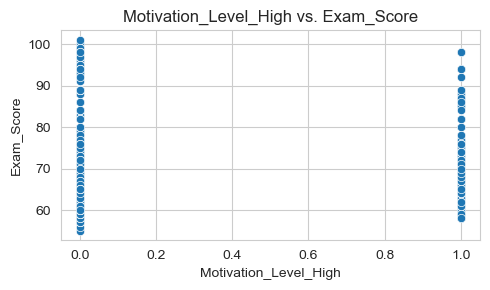

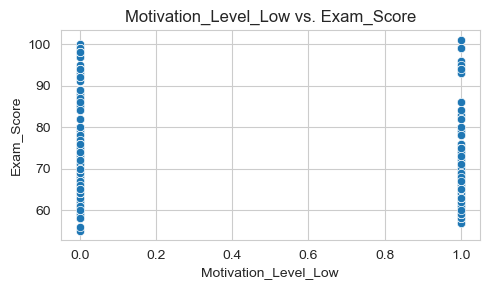

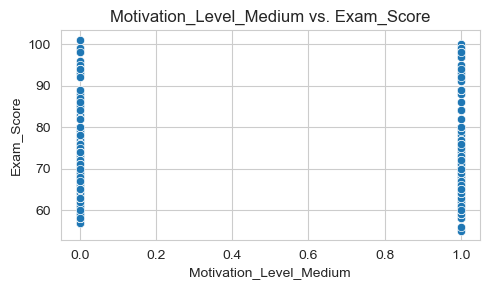

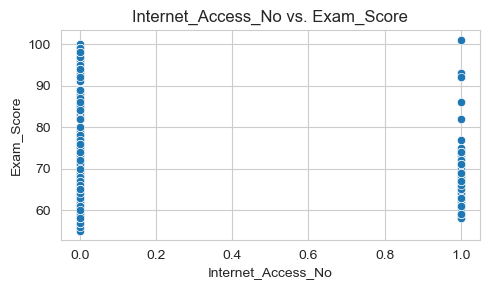

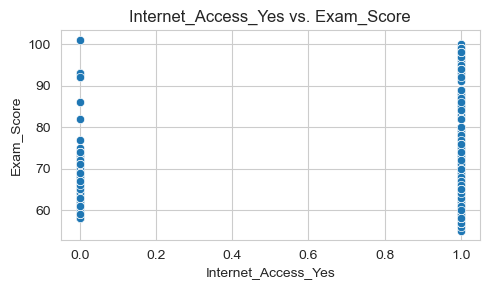

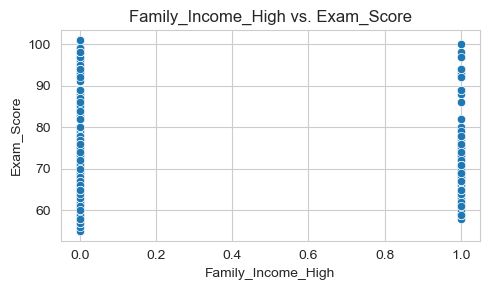

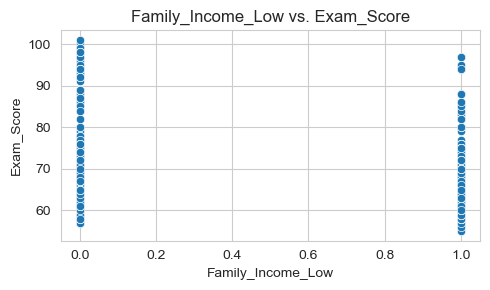

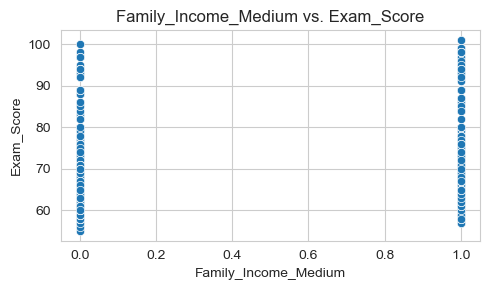

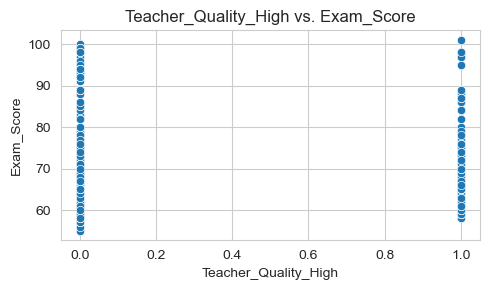

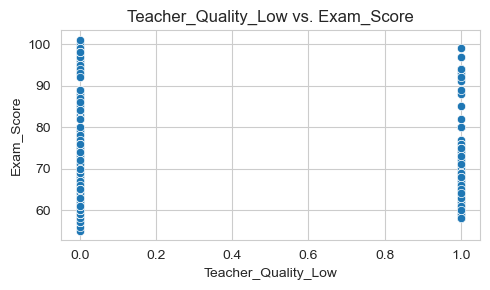

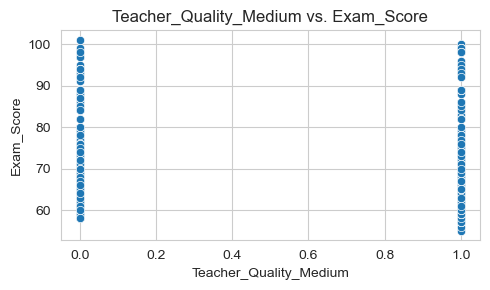

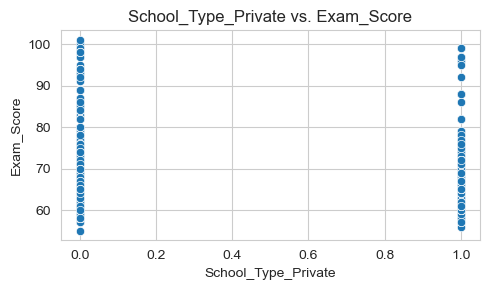

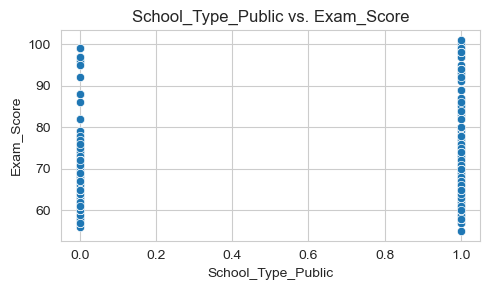

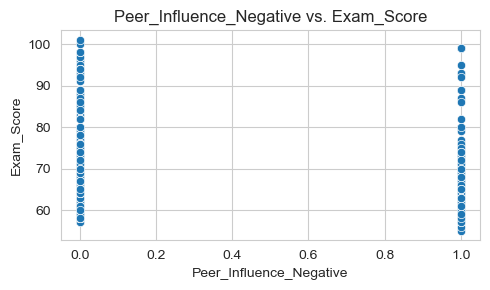

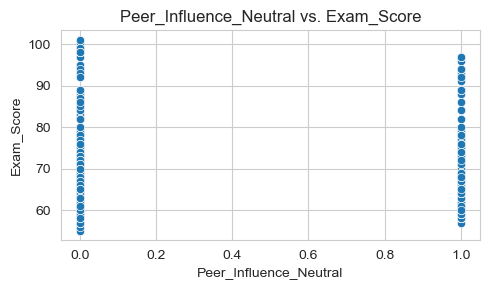

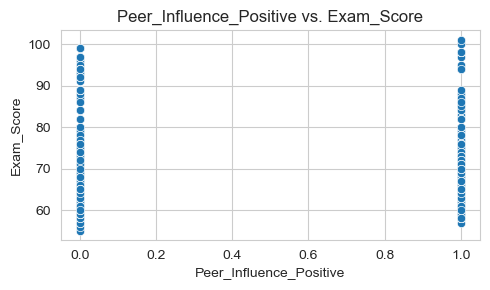

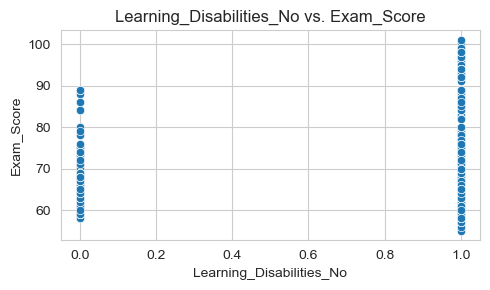

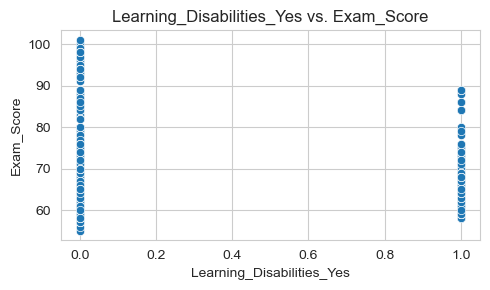

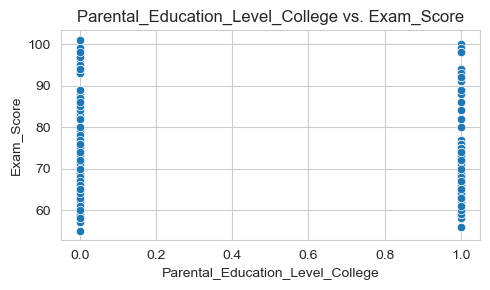

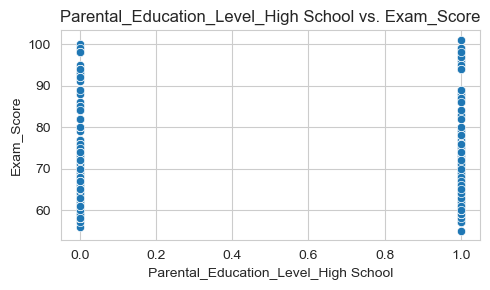

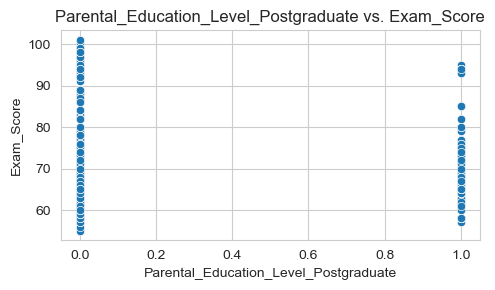

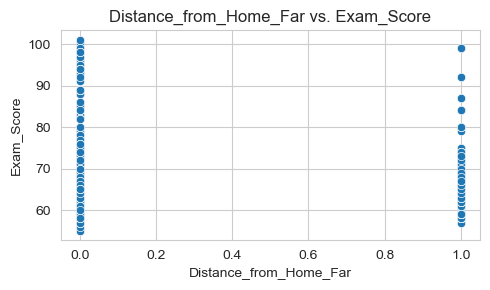

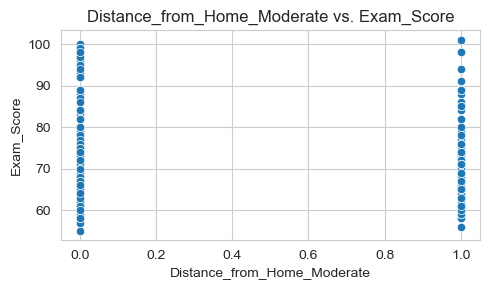

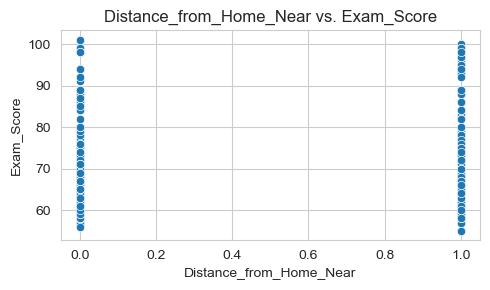

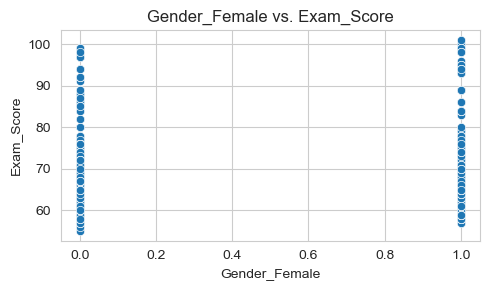

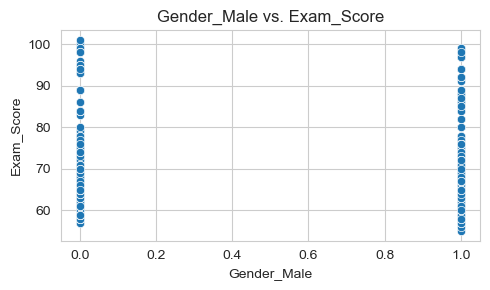

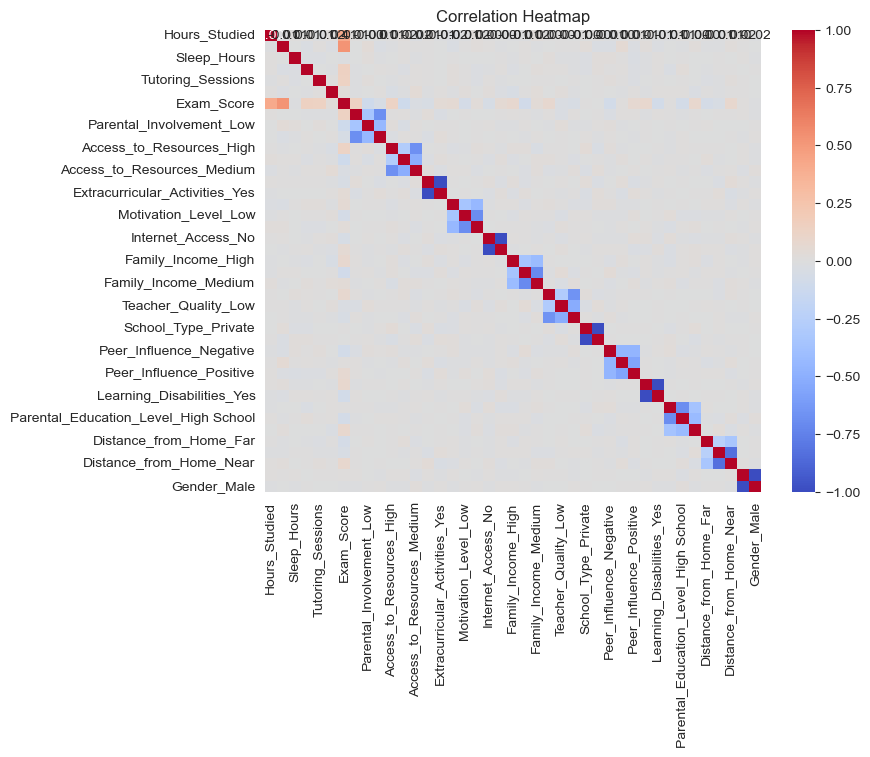

In [35]:
############################################
# 13. EXPLORATORY DATA ANALYSIS
############################################

# (A) Histograms for numeric columns
num_cols_for_plot = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols_for_plot:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# (B) Countplots for any columns still object dtype
cat_cols_for_plot = df.select_dtypes(include=[object]).columns.tolist()

for col in cat_cols_for_plot:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# (C) Scatter: each numeric vs. 'Exam_Score' (if it exists)
if "Exam_Score" in df.columns:
    for col in num_cols_for_plot:
        if col != "Exam_Score":
            plt.figure(figsize=(5,3))
            sns.scatterplot(x=df[col], y=df["Exam_Score"])
            plt.title(f"{col} vs. Exam_Score")
            plt.tight_layout()
            plt.show()

# (D) Correlation Heatmap
num_data = df.select_dtypes(include=[np.number])
if num_data.shape[1] > 1:
    plt.figure(figsize=(8,6))
    corr = num_data.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


Histograms show the distribution (skew, outliers, shape) of each numeric column. We typically look for heavily skewed data or unusual lumps.
Countplots show how frequently each category appears. This can reveal if a category is dominant or if the distribution is balanced.
Scatter plots vs. Exam_Score can highlight whether a numeric feature (e.g., Hours_Studied) correlates with final exam performance. A positive slope might indicate more studying = higher score.
Correlation Heatmap is a quick way to see which numeric features are strongly or weakly correlated. Cells near +1 or -1 indicate a strong positive/negative relationship.

In [43]:
############################################
# 14. SAVE CLEANED DATASET
############################################

df.to_csv("content/Final_cleaned_dataset.csv", index=False)
print("Cleaned dataset saved to 'cleaned_student_performance.csv'")


Cleaned dataset saved to 'cleaned_student_performance.csv'


Finally, we write the fully cleaned and preprocessed DataFrame to a new CSV file, ensuring we don’t lose our transformations. This helps if we want to skip re-running the entire cleaning pipeline next time and go straight to modeling.

=== Histograms & KDE for Numeric Columns ===


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


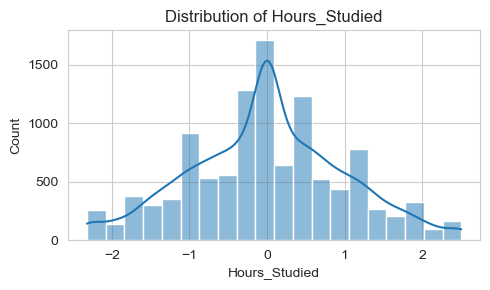

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


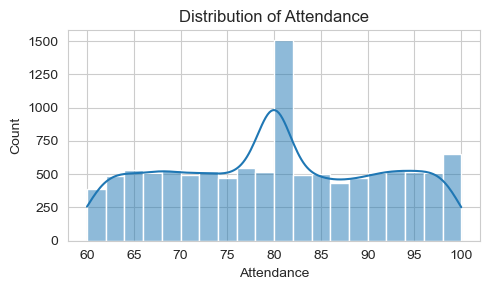

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


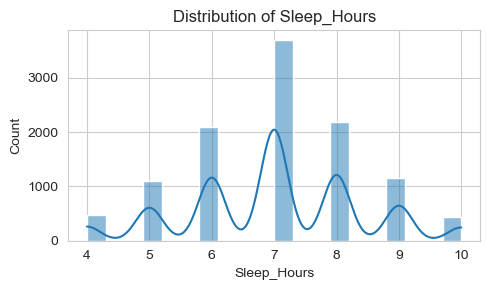

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


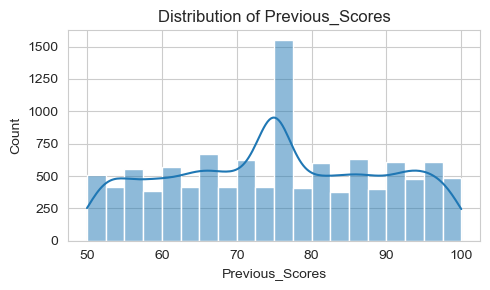

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


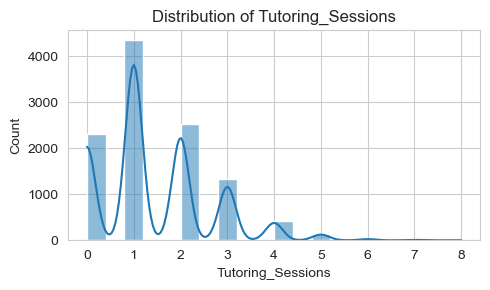

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


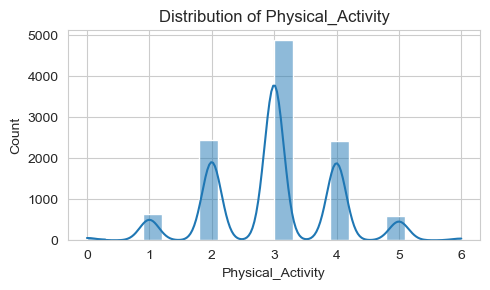

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


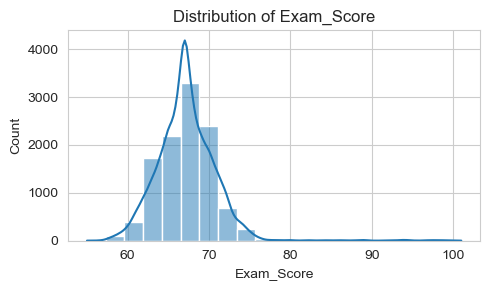

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


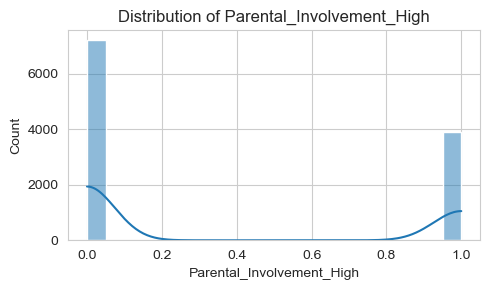

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


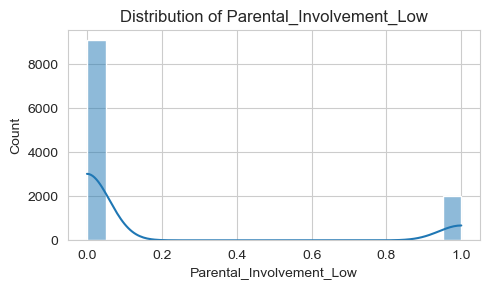

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


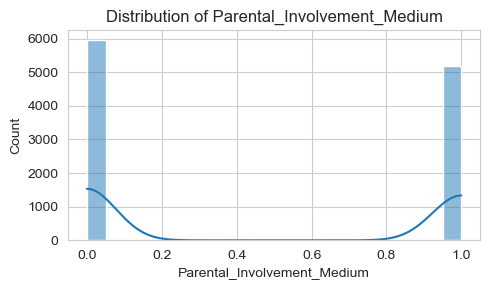

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


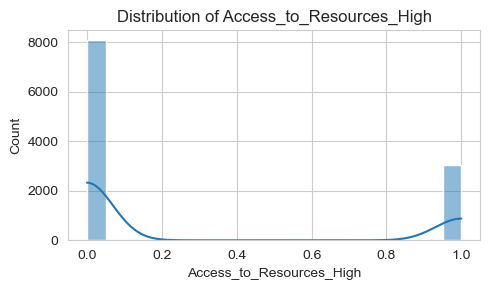

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


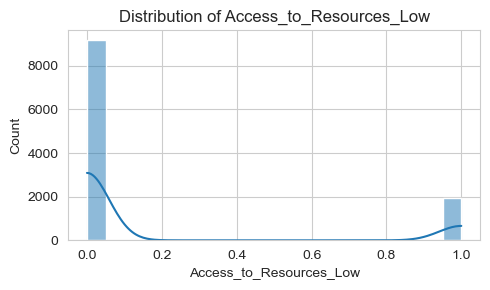

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


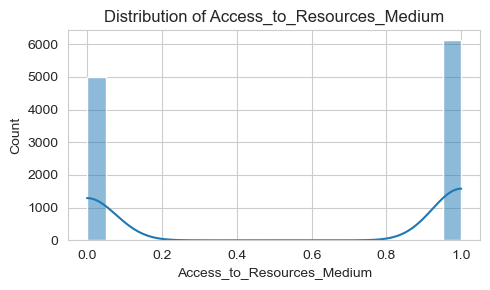

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


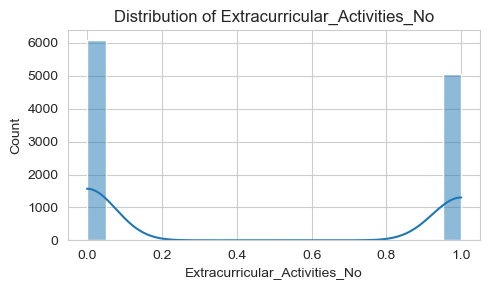

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


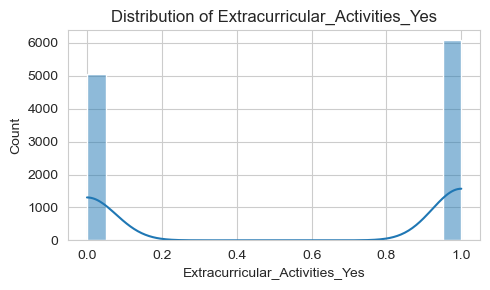

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


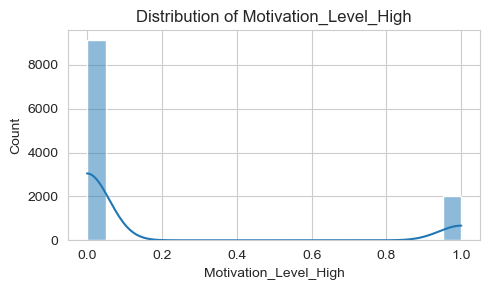

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


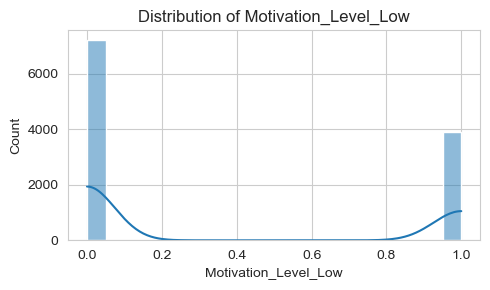

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


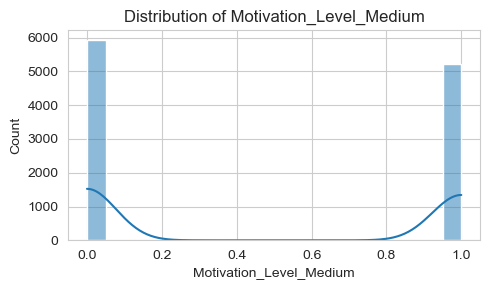

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


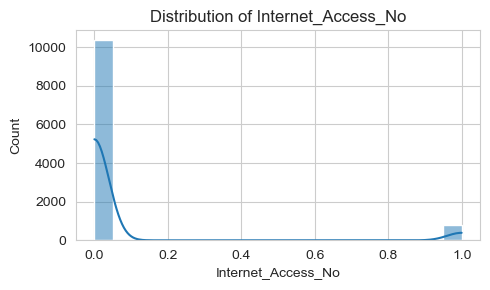

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


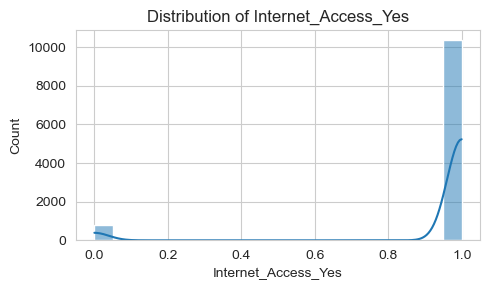

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


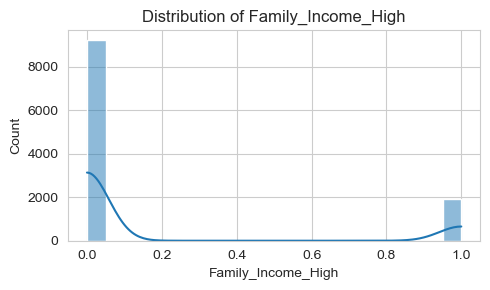

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


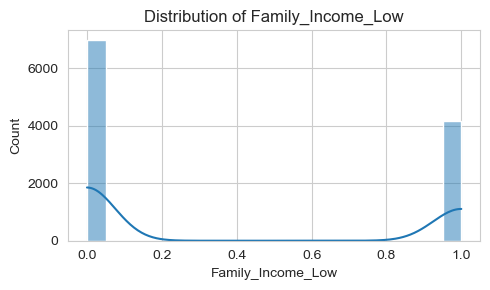

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


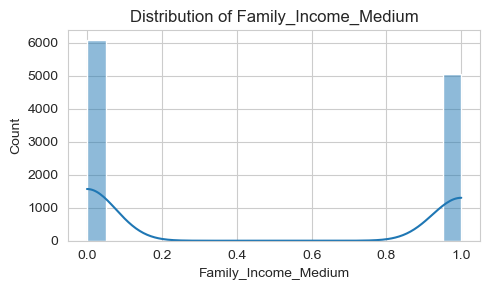

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


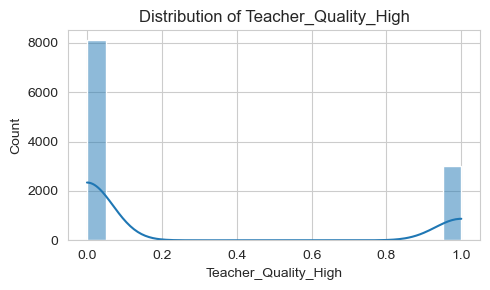

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


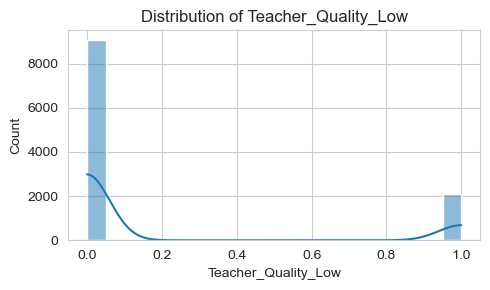

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


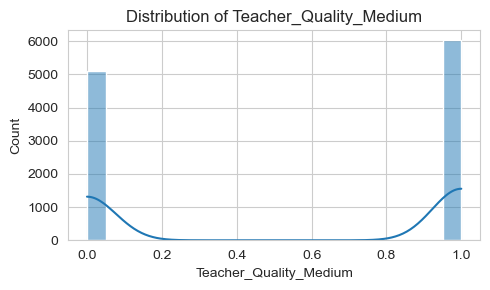

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


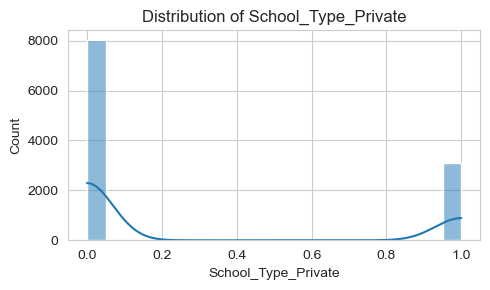

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


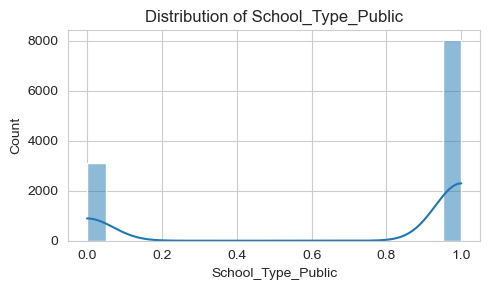

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


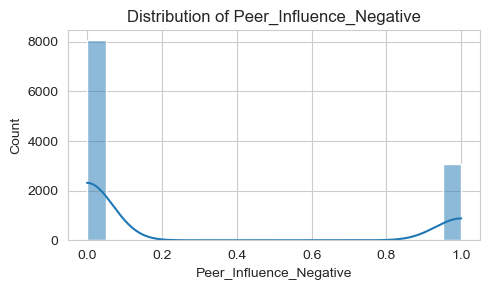

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


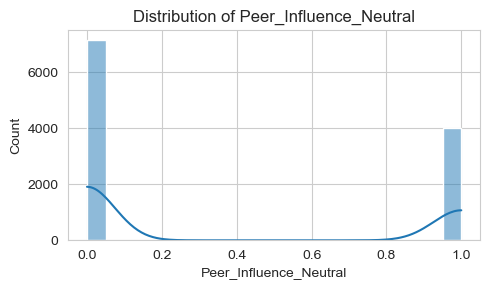

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


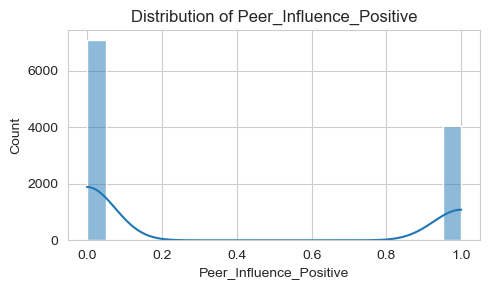

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


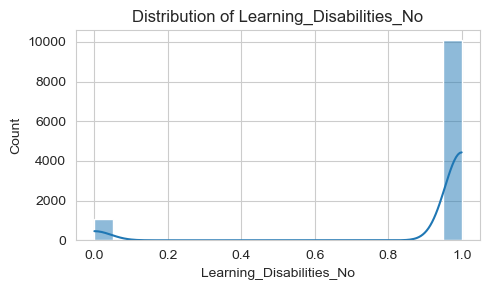

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


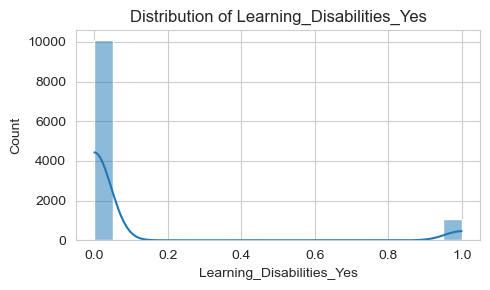

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


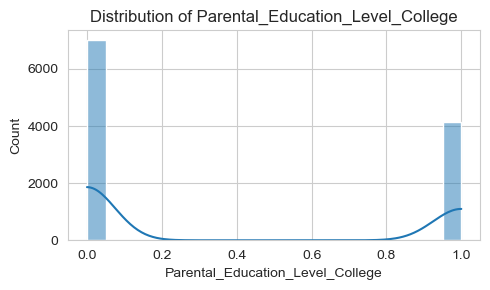

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


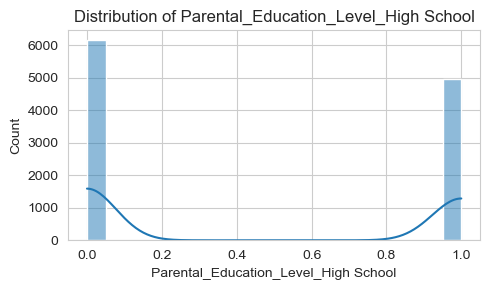

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


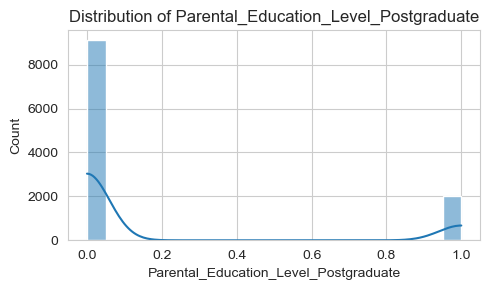

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


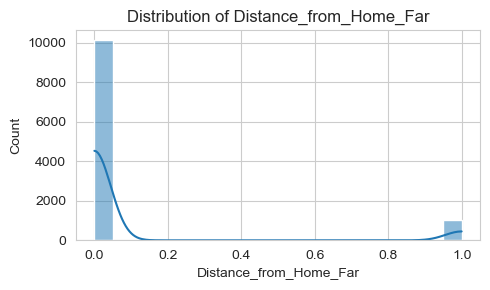

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


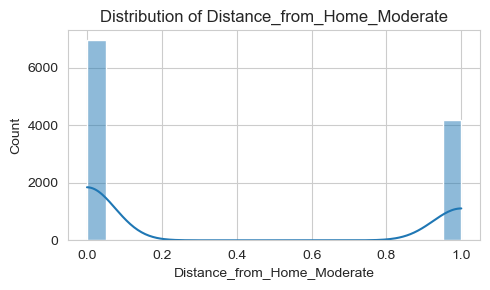

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


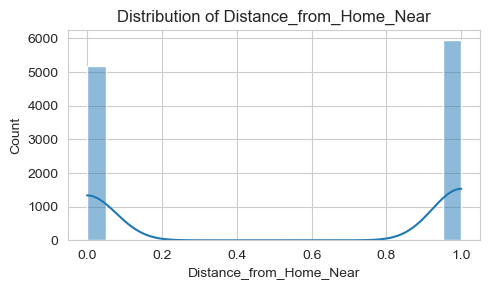

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


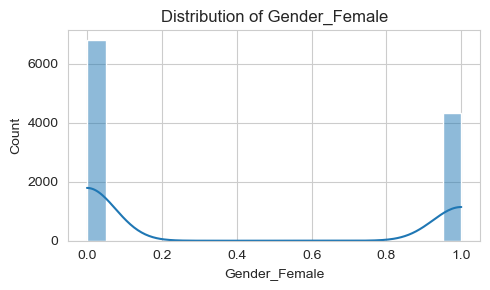

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


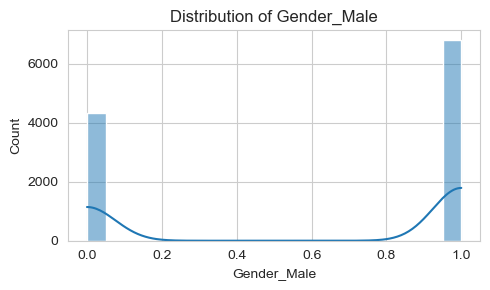

=== Countplots for Categorical Columns ===
=== Pairwise Scatter (Pairplot) ===


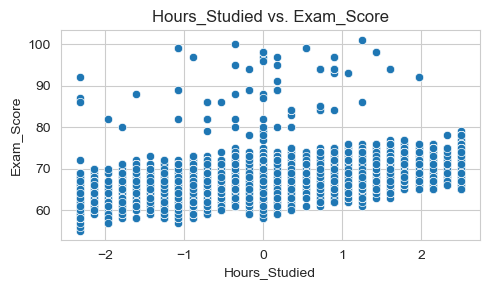

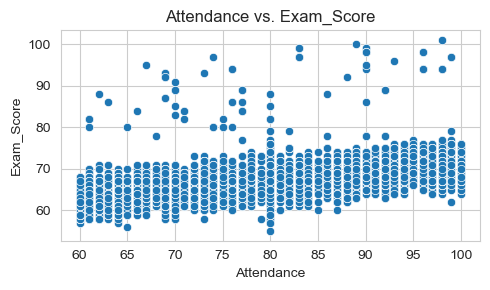

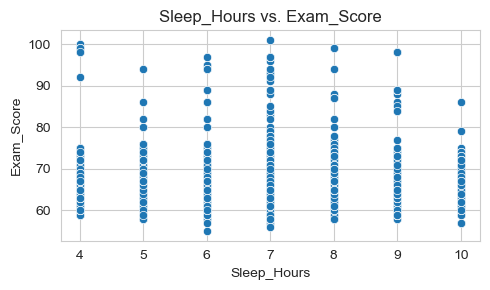

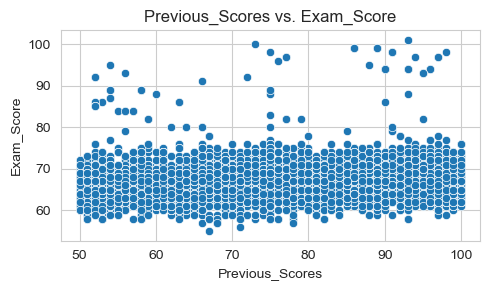

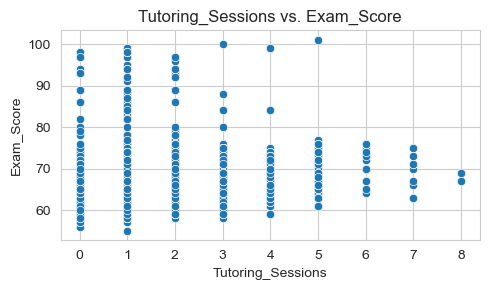

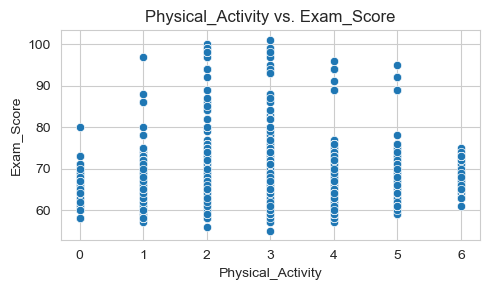

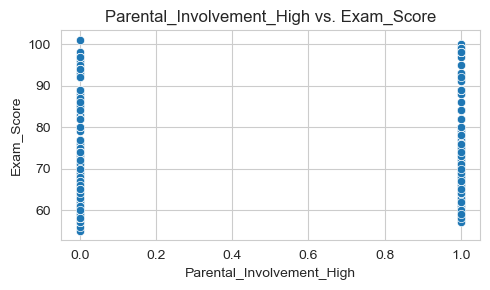

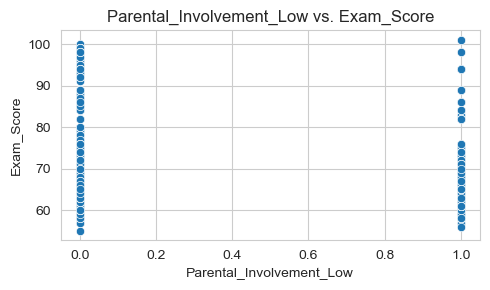

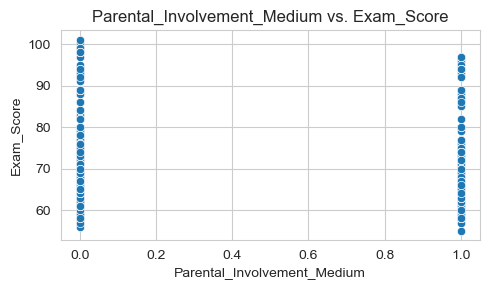

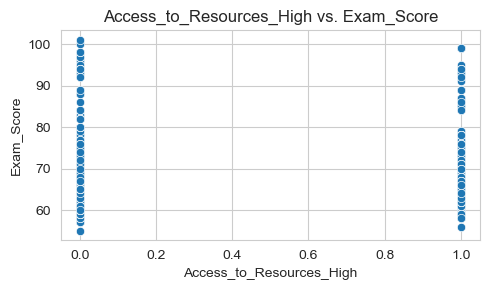

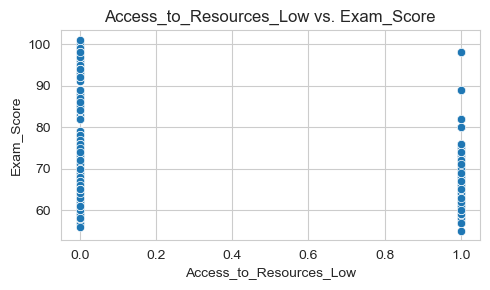

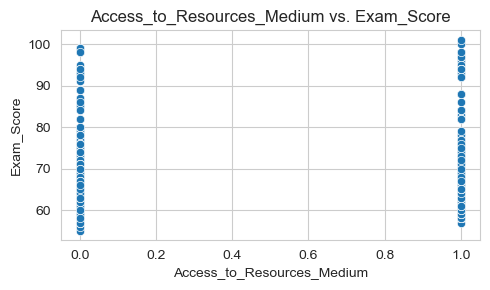

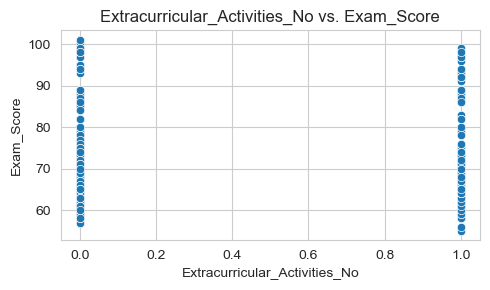

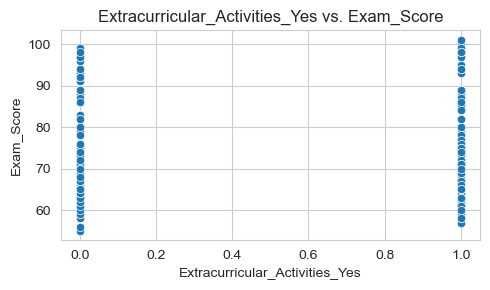

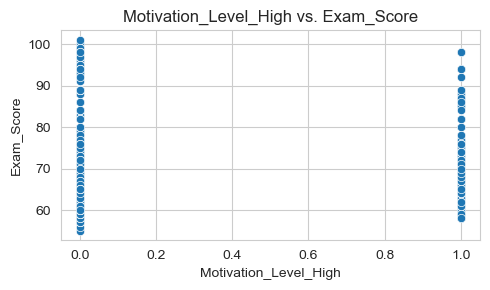

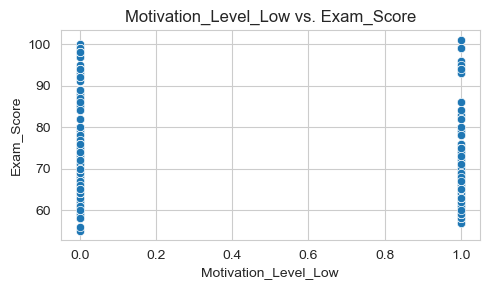

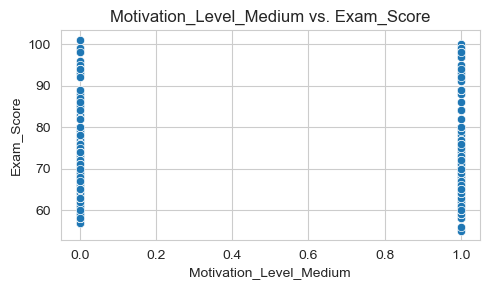

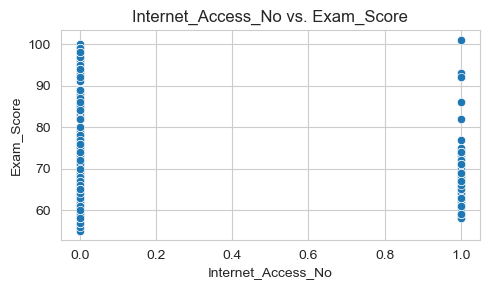

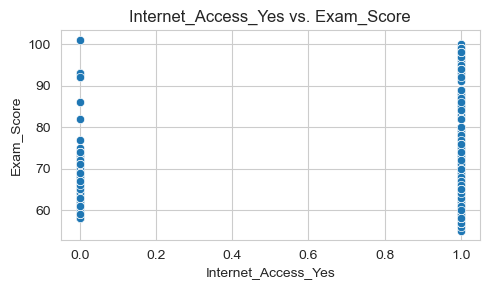

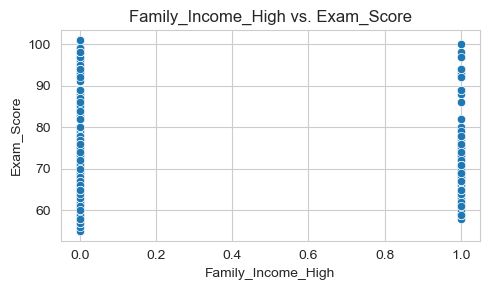

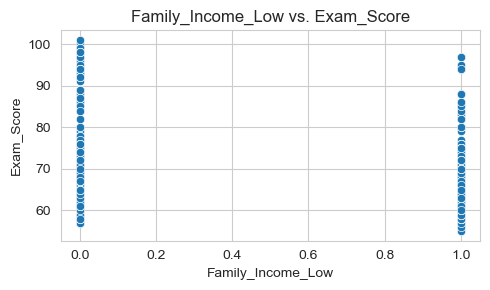

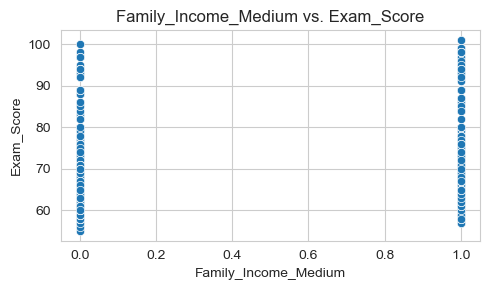

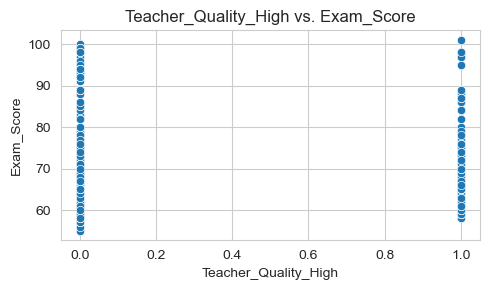

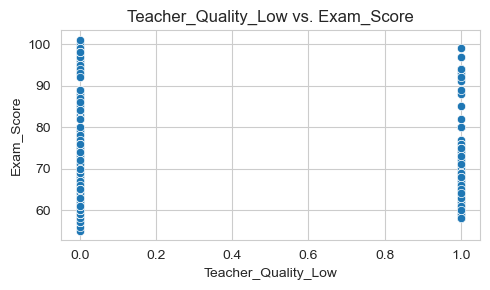

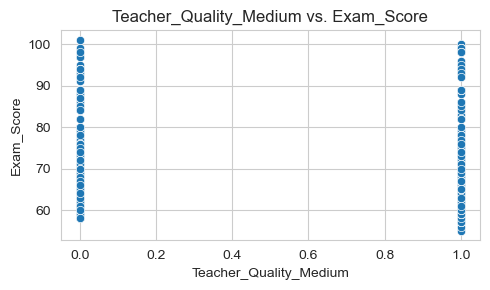

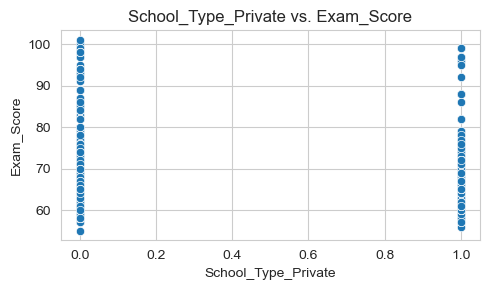

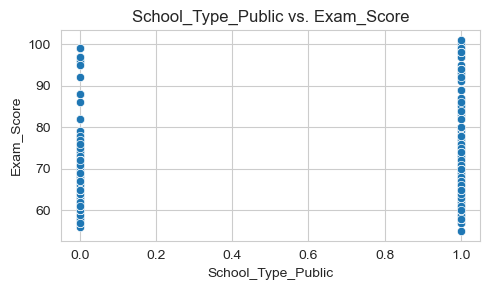

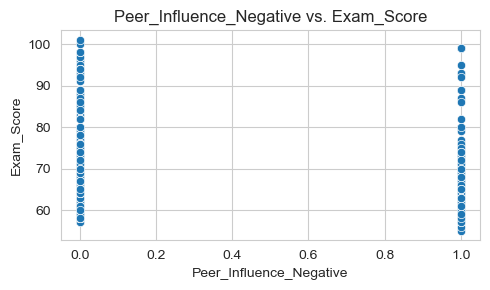

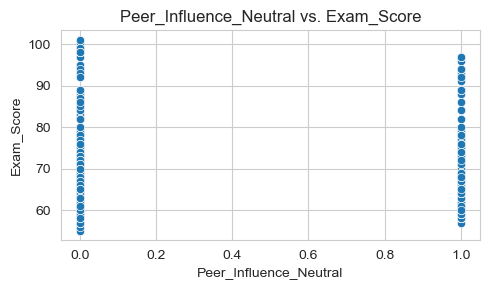

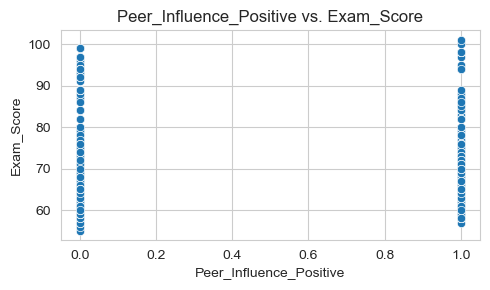

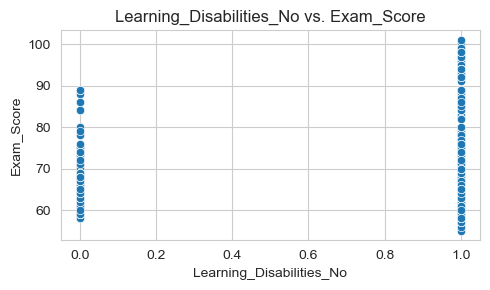

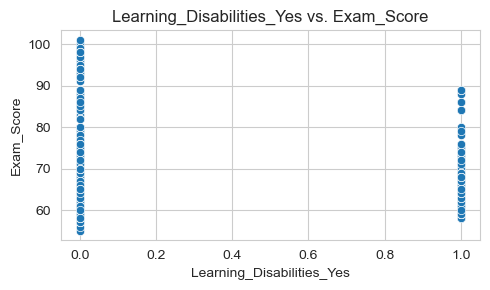

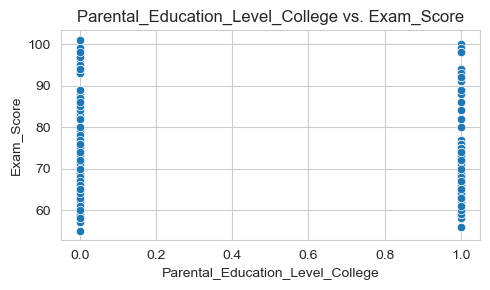

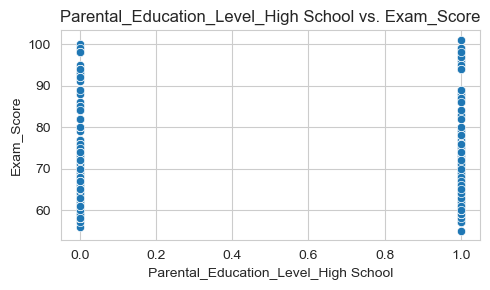

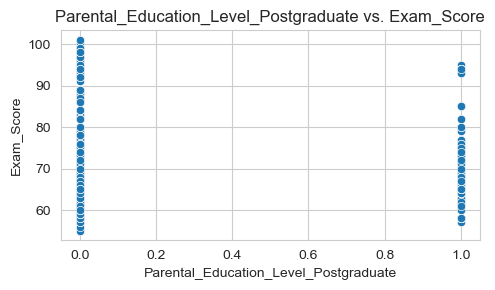

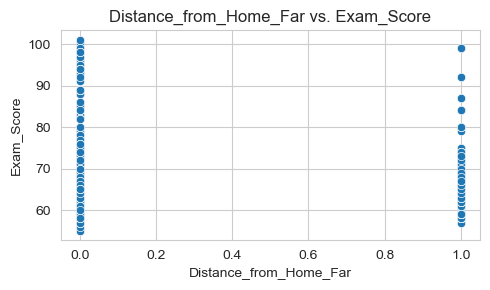

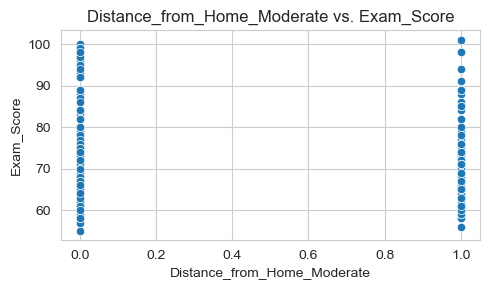

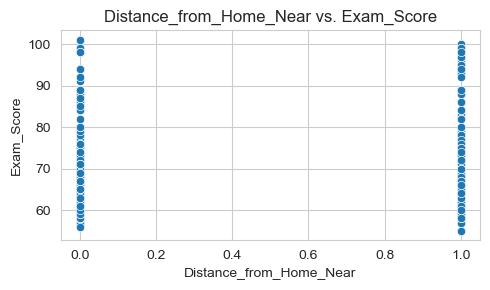

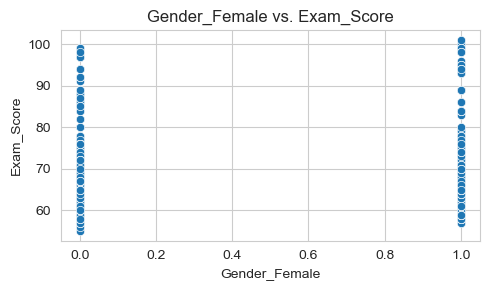

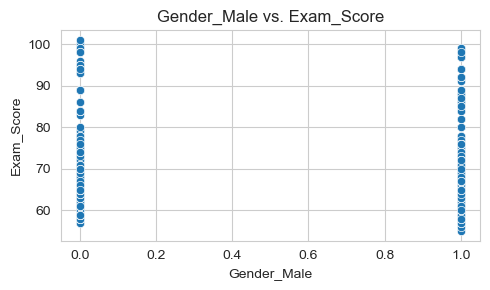

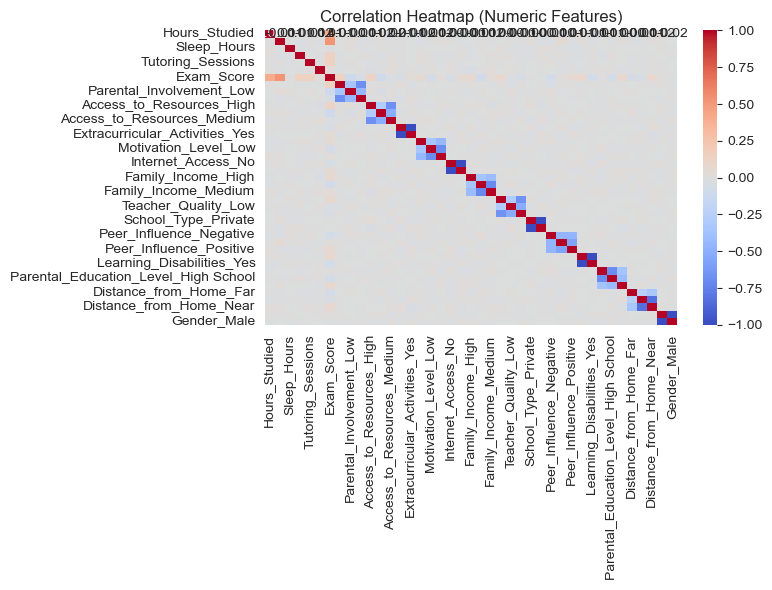

In [45]:
#####################################
# ADVANCED EDA SECTION
#####################################

import seaborn as sns
import matplotlib.pyplot as plt

# 1) UNIVARIATE ANALYSIS

# 1A) Histograms & KDE for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("=== Histograms & KDE for Numeric Columns ===")
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# 1B) Boxplots for numeric columns (quick outlier check)
# for col in numeric_cols:
#     plt.figure(figsize=(4,3))
#     sns.boxplot(x=df[col])
#     plt.title(f"Boxplot: {col}")
#     plt.tight_layout()
#     plt.show()

# 1C) Countplots for any remaining categorical columns
cat_cols = df.select_dtypes(include=[object]).columns.tolist()
print("=== Countplots for Categorical Columns ===")
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2) BIVARIATE ANALYSIS

# 2A) Pairwise Scatter among numeric columns
print("=== Pairwise Scatter (Pairplot) ===")
if len(numeric_cols) <= 10:
    sns.pairplot(df[numeric_cols], corner=True, diag_kind='kde')
    plt.suptitle("Pairplot of Numeric Features", y=1.02)
    plt.show()

# 2B) If 'Exam_Score' is numeric, let's see correlation with each numeric col
if "Exam_Score" in df.columns:
    for col in numeric_cols:
        if col != "Exam_Score":
            plt.figure(figsize=(5,3))
            sns.scatterplot(x=df[col], y=df["Exam_Score"])
            plt.title(f"{col} vs. Exam_Score")
            plt.tight_layout()
            plt.show()

# 2C) Boxplots or Violin plots for each categorical vs. 'Exam_Score'
if "Exam_Score" in df.columns and cat_cols:
    for col in cat_cols:
        plt.figure(figsize=(5,3))
        sns.boxplot(x=col, y="Exam_Score", data=df)
        plt.title(f"{col} vs. Exam_Score")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 3) MULTIVARIATE - CORRELATION HEATMAP
num_data = df.select_dtypes(include=[np.number])
if num_data.shape[1] > 1:
    plt.figure(figsize=(8,6))
    corr_matrix = num_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()


This section goes beyond basic histograms and countplots to provide a more thorough Exploratory Data Analysis (EDA). We focus on univariate analysis (histograms, countplots), bivariate analysis (pairwise scatterplots, scatter vs. Exam_Score, and boxplots vs. Exam_Score), and a multivariate correlation heatmap among numeric features. This helps uncover potential relationships, outliers, distribution shapes, and important correlations.

df.select_dtypes(include=[np.number]) retrieves a list of columns that are numeric (float64 or int64). We store these in numeric_cols.
For each numeric column col, we create a histogram with kde=True to overlay a Kernel Density Estimate curve, providing a smoothed view of the distribution.
bins=20 ensures we have a moderate bin count for clarity.
plt.tight_layout() helps avoid label overlap, and plt.show() displays the figure.
Why: Histograms and KDE plots let us see if a column is skewed (long tail), bimodal (two peaks), or fairly symmetric. This is crucial for deciding on transformations like log-scaling or outlier handling.

A boxplot is a quick way to visualize the median, interquartile range (IQR), and potential outliers for a numeric column.
If you uncomment this section, for each numeric column, it will show a horizontal boxplot.
Why: This helps identify extreme values that might need clipping or further investigation. If you encountered an error with certain columns, you can skip or fix them first (e.g., ensure the column is truly numeric).

df.select_dtypes(include=[object]) picks up columns that remain as strings (categorical data).
A countplot shows how many occurrences of each category exist in a given column (like “Low,” “Medium,” “High”).
Why: This reveals if one category dominates (class imbalance) or if the distribution is relatively balanced. For example, if “High” is extremely rare, that might be relevant for modeling or further analysis.

A pairplot (from Seaborn) creates a grid of scatterplots for every pair of numeric columns, plus diagonal histograms (or KDE plots) for each individual column.
We only run it if there are 10 or fewer numeric columns (if len(numeric_cols) <= 10) to avoid an overly cluttered matrix.
corner=True means we only show the lower triangle of the pairwise plots, reducing redundancy.
diag_kind='kde' uses a KDE curve on the diagonal instead of a histogram.
Why: This quickly reveals linear or non-linear relationships between any two numeric columns (e.g., Hours_Studied vs. Exam_Score) and can also show potential cluster patterns or outliers.

We specifically check if the column "Exam_Score" exists (the target variable).
For every numeric column other than "Exam_Score", we plot a scatterplot with that column on the x-axis and "Exam_Score" on the y-axis.
Why: This highlights potential correlations. A positive slope might mean higher Hours_Studied leads to higher Exam_Score. A random scatter might indicate no strong relationship. This is key for feature selection and understanding what influences the target variable.

If the dataset has a numeric Exam_Score and some remaining categorical columns (cat_cols), we create a boxplot for each category’s distribution of Exam_Score.
Why: This helps see if, for example, “High” Teacher_Quality yields a higher median exam score than “Low.” Or if “Yes” Extracurricular_Activities students have a different exam score distribution than “No.”
Rotation=45 for x-axis labels ensures categories remain readable if there are many or long category names.

num_data = df.select_dtypes(include=[np.number]) extracts only numeric columns from the DataFrame.
corr_matrix = num_data.corr() computes the Pearson correlation between every pair of numeric features.
sns.heatmap(...) visualizes these correlations in a grid, with annot=True to print the correlation coefficient and a color gradient (red for positive, blue for negative, etc.).
Why: This provides a high-level overview of which features are strongly or weakly correlated. For instance, if Previous_Scores is strongly correlated with Exam_Score, that’s an important insight for modeling.
We only do this if there is more than 1 numeric column (if num_data.shape[1] > 1).

Univariate: Histograms (and optional boxplots) let us see distribution shapes and potential outliers.
Bivariate: Pairplots, scatterplots vs. Exam_Score, and boxplots vs. Exam_Score reveal relationships between features and the target or between features themselves.
Multivariate: The correlation heatmap shows how all numeric columns interrelate, which is vital for feature selection or identifying collinearity.


Mean Squared Error: 4.61
Root Mean Squared Error: 2.15
R² Score: 0.68


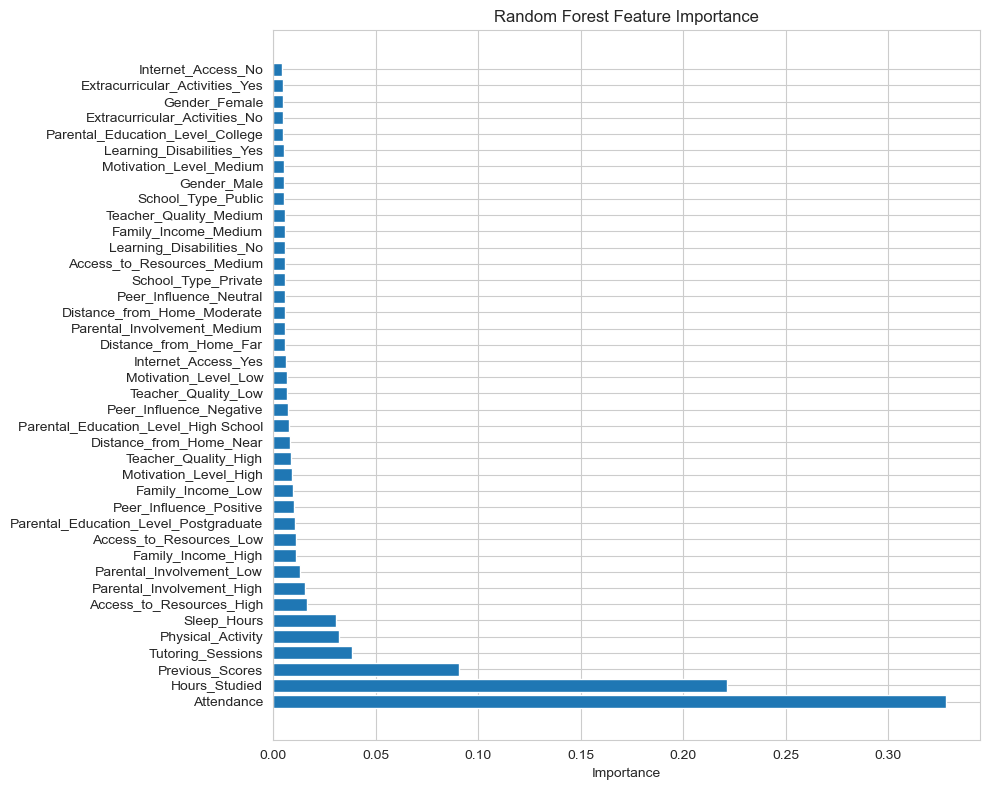

                                  Feature  Importance
0                              Attendance    0.328344
1                           Hours_Studied    0.221184
2                         Previous_Scores    0.090884
3                       Tutoring_Sessions    0.038325
4                       Physical_Activity    0.032050
5                             Sleep_Hours    0.030893
6                Access_to_Resources_High    0.016679
7               Parental_Involvement_High    0.015730
8                Parental_Involvement_Low    0.013287
9                      Family_Income_High    0.011397
10                Access_to_Resources_Low    0.011087
11  Parental_Education_Level_Postgraduate    0.010798
12                Peer_Influence_Positive    0.010172
13                      Family_Income_Low    0.009551
14                  Motivation_Level_High    0.009427
15                   Teacher_Quality_High    0.008925
16                Distance_from_Home_Near    0.008327
17   Parental_Education_Leve

In [47]:
############################################
# MACHINE LEARNING - PART 1: REGRESSION MODEL
############################################

# Import the necessary libraries for machine learning
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestRegressor    # Our main regression algorithm
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation
import numpy as np  # For numerical operations

# Step 1: Define target and feature variables
# --------------------------------------------
# We're using Exam_Score as our target variable (what we want to predict)
# All other numeric columns will be used as features (predictors)
y = df['Exam_Score']  # Target: The student's exam score
x = df.drop(['Exam_Score'], axis=1)  # Features: All other columns

# Step 2: Split the data into training and testing sets
# ----------------------------------------------------
# We use 80% of our data for training the model and reserve 20% for testing
# Setting random_state ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Regression model
# -----------------------------------------------
# Random Forest is an ensemble learning method that builds multiple decision trees and
# combines their predictions for better accuracy and to prevent overfitting
best_rf = RandomForestRegressor(
    n_estimators=100,     # Number of trees in the forest
    max_depth=None,       # Maximum depth of the trees (None means unlimited)
    min_samples_split=2,  # Minimum samples required to split an internal node
    min_samples_leaf=1,   # Minimum samples required to be at a leaf node
    random_state=42       # Ensures reproducibility
)

# Fit the model to our training data
best_rf.fit(X_train, y_train)

# Step 4: Evaluate the model's performance
# ----------------------------------------
# Make predictions on our test set
y_pred = best_rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared, proportion of variance explained

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 5: Analyze feature importance
# ----------------------------------
# Random Forests provide a measure of how important each feature is for prediction
# We extract this information to identify which factors most strongly influence exam scores
feature_importance = best_rf.feature_importances_

# Sort features by importance (descending order)
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [x.columns[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Visualize feature importance with a bar chart
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), sorted_importance)
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.xlabel('Importance')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# Convert to DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': sorted_features,
    'Importance': sorted_importance
})
print(importance_df)

# Step 6: Feature Selection - Remove Less Important Features
# ---------------------------------------------------------
# Based on feature importance, we can simplify our model by keeping only
# the most influential features, which often leads to similar performance
# with a more interpretable model

# Set a threshold to remove features with very low importance (e.g., less than 0.01)
threshold = 0.01
important_features = [feature for feature, importance in
                     zip(sorted_features, sorted_importance) if importance >= threshold]
print(f"Selected {len(important_features)} important features")

# Reduce dataset to only important features
X_reduced = x[important_features]
X_train_reduced, X_test_reduced = train_test_split(X_reduced, test_size=0.2, random_state=42)

# Step 7: Retrain Model with Reduced Features
# -------------------------------------------
# Train a new Random Forest using only the important features
best_rf_reduced = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
best_rf_reduced.fit(X_train_reduced, y_train)

# Step 8: Evaluate the simplified model
# -------------------------------------
# Test if feature selection maintained or improved performance
y_pred_reduced = best_rf_reduced.predict(X_test_reduced)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
rmse_reduced = np.sqrt(mse_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Reduced Model - Mean Squared Error: {mse_reduced:.2f}")
print(f"Reduced Model - Root Mean Squared Error: {rmse_reduced:.2f}")
print(f"Reduced Model - R² Score: {r2_reduced:.2f}")

# Compare the full and reduced models
print("\nComparison:")
print(f"Full model features: {x.shape[1]}, Reduced model features: {len(important_features)}")
print(f"Performance difference (R²): {r2 - r2_reduced:.4f}")

Grade_Category
F      105
D+     121
C-    3027
C+    6212
B-    1539
B+      52
A-      14
A+      18
@-      35
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


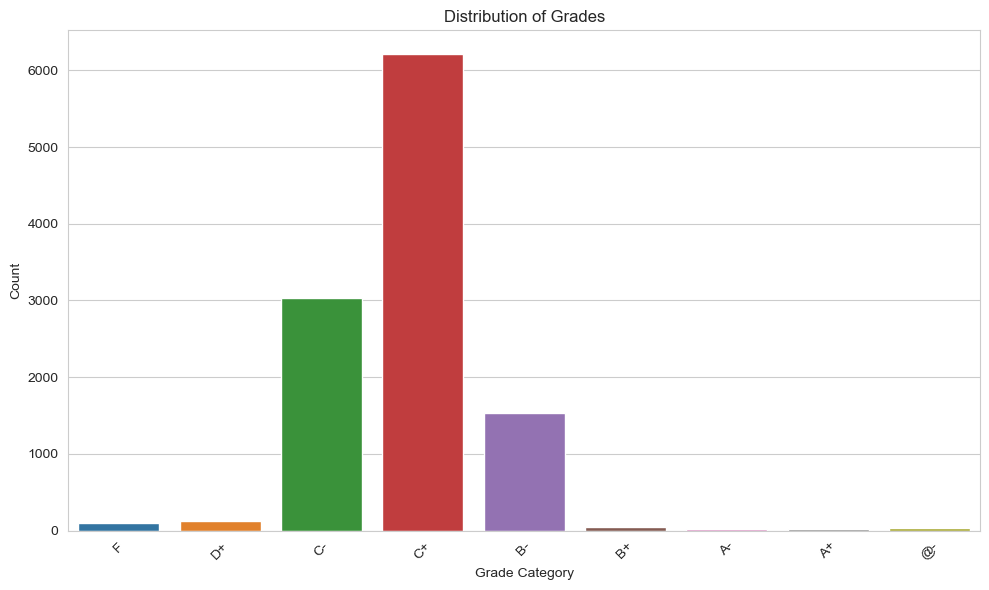

In [49]:
############################################
# MACHINE LEARNING - PART 2: CLASSIFICATION MODEL
############################################

# In this section, we'll convert the exam score prediction problem into a classification task
# where we predict grade categories (A, B, C, D, F) rather than exact scores

# Step 1: Discretize the continuous Exam_Score into grade categories
# -----------------------------------------------------------------
# Converting numerical scores into letter grade ranges allows us to treat this
# as a classification problem instead of regression

# Categorize the Exam_Score column into grade ranges
# Define bins (merging 50-54 into 55-59 and keeping 95-101 as the last range)
bins = [50, 59] + list(range(60, 95, 5)) + [101]  # Corrected last bin to match the range

# Define labels ensuring one less than bins
labels = ['F'] + [f"{chr(64 + (i//2))}{'-' if i % 2 else '+'}" for i in range(8, 0, -1)]

# Apply binning - this creates a new column with categorical grade ranges
df['Grade_Category'] = pd.cut(df['Exam_Score'], bins=bins, labels=labels, include_lowest=True)

# Convert range labels to float by taking the midpoint - useful for certain visualizations
df['Grade_Numeric'] = df['Grade_Category'].cat.codes

# Display how many values are in each range to check class balance
grade_counts = df['Grade_Category'].value_counts().sort_index()
print(grade_counts)

# Visualize the distribution of grades
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade_Category', data=df, order=grade_counts.index)
plt.title('Distribution of Grades')
plt.xlabel('Grade Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Accuracy: 0.7834

Classification Report (Random Forest):
               precision    recall  f1-score   support

          @-       1.00      0.12      0.22         8
          A+       1.00      0.75      0.86         4
          A-       1.00      0.50      0.67         2
          B+       1.00      0.30      0.46        10
          B-       0.91      0.45      0.60       317
          C+       0.74      0.95      0.84      1191
          C-       0.85      0.68      0.76       642
          D+       1.00      0.38      0.56        26
           F       0.82      0.36      0.50        25

    accuracy                           0.78      2225
   macro avg       0.93      0.50      0.61      2225
weighted avg       0.81      0.78      0.77      2225



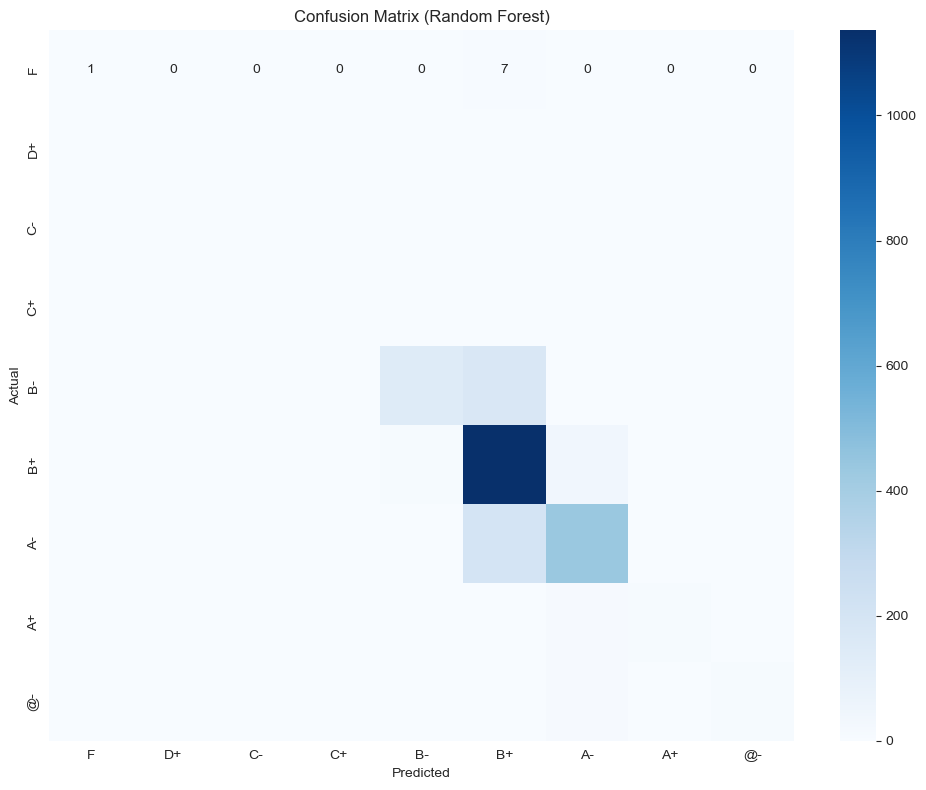

In [51]:
# Step 2: Prepare data for classification
# --------------------------------------
# Import necessary libraries for classification tasks
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Convert target to categorical
y = df['Grade_Category']  # Target is now the grade category
X = df.drop(['Exam_Score', 'Grade_Category', 'Grade_Numeric'], axis=1)  # Features

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Classifier
# -------------------------------------
# Random Forest works well for classification tasks and can handle categorical targets
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the classifier
# --------------------------------------------------
# Generate predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate basic accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Step 5: Detailed performance evaluation
# --------------------------------------
# Evaluate with more detailed metrics beyond simple accuracy

# Classification Report provides precision, recall, and F1-score for each class
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Generate Confusion Matrix to see which classes are confused with each other
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for better visualization of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_counts.index,
            yticklabels=grade_counts.index)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.tight_layout()
plt.show()


Grade_Category
50-59      226
60-69     9239
70-79     1591
80-89       32
90-101      35
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


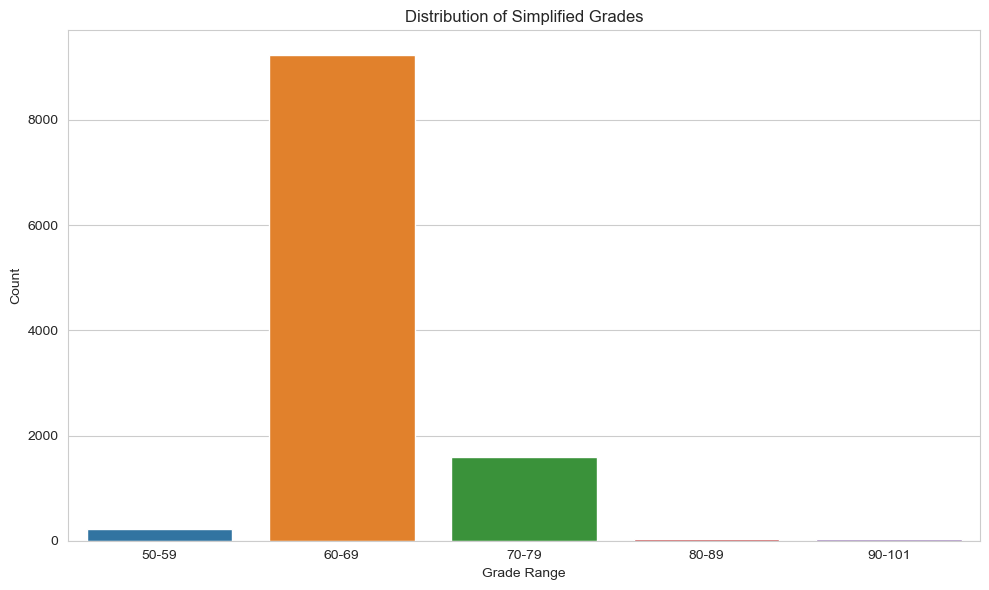

In [53]:
############################################
# MACHINE LEARNING - PART 3: SIMPLIFIED CLASSIFICATION MODEL
############################################

# In this section, we reduce the number of grade categories to improve
# classification performance by addressing class imbalance issues

# Step 1: Redefine grade categories with broader bins
# --------------------------------------------------
# Use broader grade ranges (10 point intervals) to have fewer, more balanced classes

# Define new bins for ranges of 10
bins = [50, 60, 70, 80, 90, 101]  # Bin edges
labels = ["50-59", "60-69", "70-79", "80-89", "90-101"]  # Corresponding labels

# Apply binning
df['Grade_Category'] = pd.cut(df['Exam_Score'], bins=bins, labels=labels, include_lowest=True)

# Convert range labels to float by taking the midpoint
df['Grade_Numeric'] = df['Grade_Category'].cat.codes

# Display counts for each category
grade_counts = df['Grade_Category'].value_counts().sort_index()
print(grade_counts)

# Visualize the new grade distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade_Category', data=df, order=grade_counts.index)
plt.title('Distribution of Simplified Grades')
plt.xlabel('Grade Range')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Accuracy: 0.9056

Evaluation Metrics (Random Forest):
Accuracy: 0.9056

Classification Report (Random Forest):
               precision    recall  f1-score   support

       50-59       0.89      0.31      0.46        51
       60-69       0.90      0.99      0.95      1833
       70-79       0.95      0.53      0.68       327
       80-89       1.00      0.50      0.67         6
      90-101       1.00      0.12      0.22         8

    accuracy                           0.91      2225
   macro avg       0.95      0.49      0.60      2225
weighted avg       0.91      0.91      0.89      2225



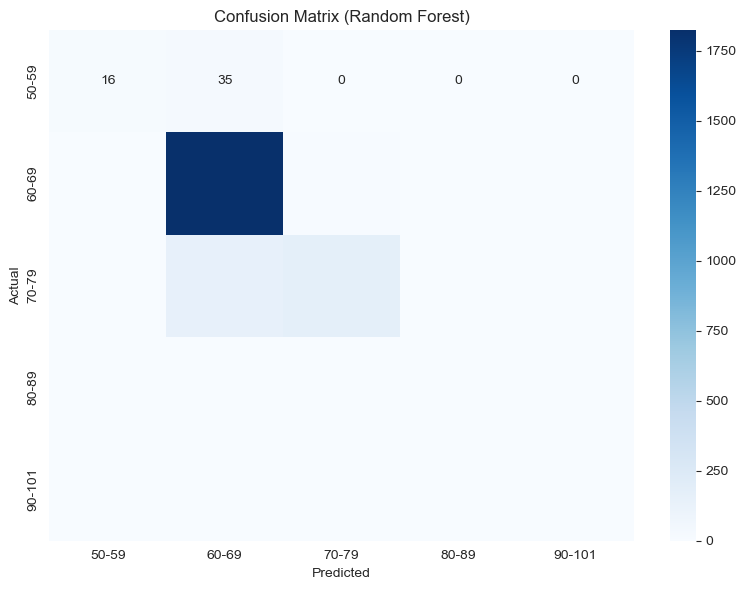

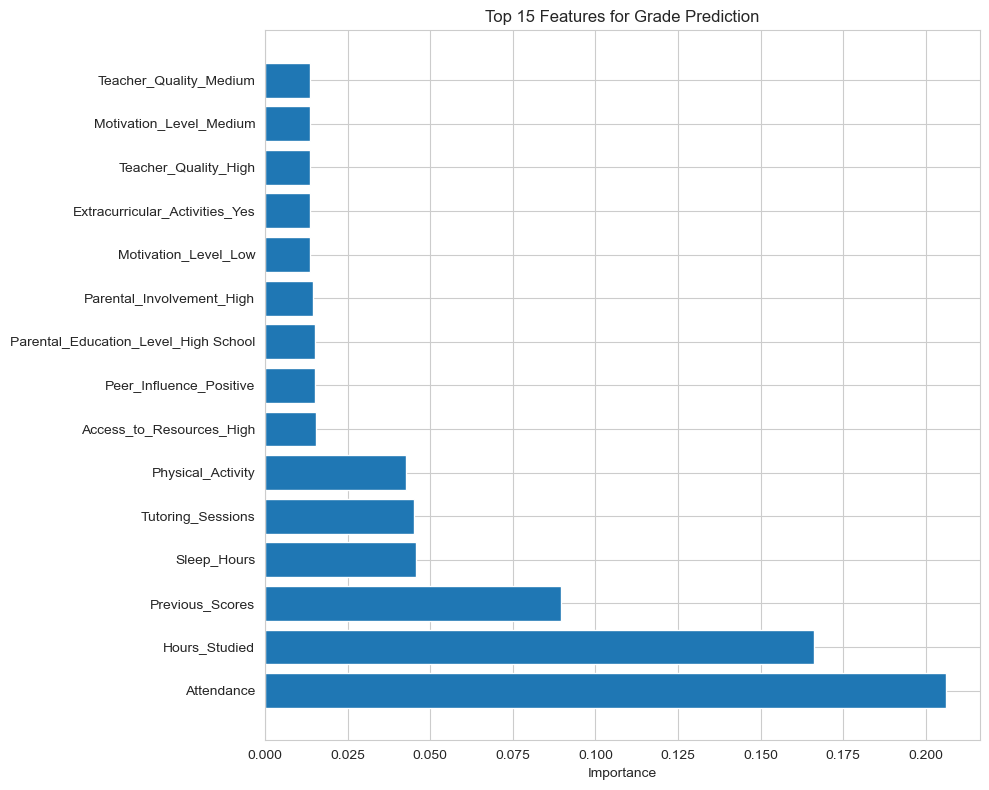

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Step 2: Prepare data for classification with new categories
# ---------------------------------------------------------
# Similar process as before but with our new simplified grade ranges

# Convert target to categorical
y = df['Grade_Category']  # Target is the simplified grade range
X = df.drop(['Exam_Score', 'Grade_Category', 'Grade_Numeric'], axis=1)  # Features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Classifier
# -------------------------------------
# Using fewer estimators since we have simpler categories
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Make predictions with the classifier
# -------------------------------------------
y_pred_rf = rf.predict(X_test)

# Step 5: Evaluate the simplified classifier
# -----------------------------------------
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

print("\nEvaluation Metrics (Random Forest):")
print(f"Accuracy: {accuracy:.4f}")

# Classification Report for detailed metrics per class
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Generate and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_counts.index,
            yticklabels=grade_counts.index)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.tight_layout()
plt.show()

# Step 6: Analyze feature importance for grade prediction
# -----------------------------------------------------
# Identify which factors most strongly influence grade categories
importance = rf.feature_importances_
sorted_idx = np.argsort(importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_importance = importance[sorted_idx]

# Display feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance[:15])), sorted_importance[:15])
plt.yticks(range(len(sorted_importance[:15])), [sorted_features[i] for i in range(15)])
plt.xlabel('Importance')
plt.title("Top 15 Features for Grade Prediction")
plt.tight_layout()
plt.show()

PART 2: CST3133_Part_Two_NLP_And_Deep_Learning


Step 1: Imports and Setup

In [1]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jekyt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Step 2: Data Loading and Combination

In [2]:
# Set random seed for reproducibility
import random
random.seed(42)
np.random.seed(42)

In [12]:
# Files are stored in the 'content' folder.

# Choose ONE of these approaches:

# Option 1: Check if we're in Colab, and if so, upload files
try:
    import google.colab
    # We're in Colab, so we need to upload files
    from google.colab import files
    uploaded = files.upload()  # This will prompt you to select files
    # After uploading, the files will be in the current directory
    fake_path = "Fake.csv"
    true_path = "True.csv"
except ImportError:
    # We're not in Colab, use the local paths
    fake_path = os.path.join("content", "Fake.csv")
    true_path = os.path.join("content", "True.csv")

# Option 2: If the files are already in Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# fake_path = "/content/drive/My Drive/your_folder/Fake.csv"
# true_path = "/content/drive/My Drive/your_folder/True.csv"

In [13]:
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

# Add a label column: 0 for fake, 1 for true
fake_df['label'] = 0
true_df['label'] = 1

In [14]:
# Concatenate the DataFrames
df = pd.concat([fake_df, true_df], ignore_index=True)

# Keep only the necessary columns: title, text, and label.
df = df[['title', 'text', 'label']]

Step 3: Data Cleaning and Preprocessing

In [15]:
# Check and drop missing values
print("Missing values before:", df.isnull().sum())
df.dropna(inplace=True)
print("Missing values after:", df.isnull().sum())

Missing values before: title    0
text     0
label    0
dtype: int64
Missing values after: title    0
text     0
label    0
dtype: int64


In [16]:
# Create a new column 'combined_text' that concatenates the title and text.
df['combined_text'] = df['title'] + ' ' + df['text']

In [17]:
# --- Text Cleaning Function ---
contractions = {
    "can't": "cannot", "I'm": "I am", "it's": "it is",
    "they're": "they are", "you're": "you are", "won't": "will not",
    "isn't": "is not", "didn't": "did not", "don't": "do not",
    "i'm": "i am", "he's": "he is", "she's": "she is",
    "we're": "we are", "they've": "they have", "we've": "we have"
}
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    for key, value in contractions.items():
        text = re.sub(r"\b" + re.escape(key) + r"\b", value, text)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['combined_text'] = df['combined_text'].apply(clean_text)

Step 4: Tokenization

In [63]:
# We use a simple whitespace split. (Alternatively, nltk.word_tokenize can be used)
def tokenize(text):
    words = text.split()
    return words

df['tokens'] = df['combined_text'].apply(tokenize)

Step 5: Build Vocabulary and Word-to-Index Mapping

In [64]:
MAX_VOCAB_SIZE = 20000  # Limit vocabulary size
counter = Counter([word for tokens in df['tokens'] for word in tokens])
most_common = counter.most_common(MAX_VOCAB_SIZE - 2)  # Reserve indices for <PAD> and <UNK>

Step 6: Convert Tokens to Sequences and Padding

In [65]:
word2idx = {"<PAD>": 0, "<UNK>": 1}
for idx, (word, _) in enumerate(most_common, start=2):
    word2idx[word] = idx

# Compute vocabulary size from the word-to-index mapping
vocab_size = len(word2idx)
print("Vocabulary Size:", vocab_size)

Vocabulary Size: 20000


Convert Tokens to Sequences

In [66]:
def tokens_to_sequence(tokens, word2idx):
    return [word2idx.get(word, word2idx["<UNK>"]) for word in tokens]

df['sequence'] = df['tokens'].apply(lambda x: tokens_to_sequence(x, word2idx))


Padding Sequences

In [67]:
MAX_SEQUENCE_LENGTH = 200  # Adjust this value based on distribution or experimentation

def pad_sequence(seq, max_len):
    if len(seq) < max_len:
        return seq + [0] * (max_len - len(seq))
    else:
        return seq[:max_len]

df['padded_seq'] = df['sequence'].apply(lambda x: pad_sequence(x, MAX_SEQUENCE_LENGTH))

In [68]:
# Prepare features and labels
X = np.array(df['padded_seq'].tolist())
y = df['label'].values

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)

Feature shape: (44898, 200)
Labels shape: (44898,)


In [69]:
#!jar xvf glove.6B.zip

Step 7: Pre-trained Embeddings (GloVe)

In [70]:
import os
import re
import numpy as np

EMBEDDING_DIM = 100  # Dimensionality of the GloVe embeddings
GLOVE_DIR = 'glove.6B' #  Create a folder named 'glove.6B' in the 'content' directory. Place glove.6B.100d.txt inside it.
embeddings_index = {}

try:
    with open(os.path.join('./', 'glove.6B.100d.txt'), encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
except FileNotFoundError:
    print("GloVe file not found. Please download 'glove.6B.zip' from https://nlp.stanford.edu/projects/glove/,")
    print("extract it, and place 'glove.6B.100d.txt' in a folder named 'glove.6B' inside the 'content' directory.")
    exit() # Stop execution if the file is not found.

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [71]:
# Prepare the embedding matrix
vocab_size = len(word2idx)  # Ensure vocab_size is defined
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, idx in word2idx.items():
    vector = embeddings_index.get(word)
    if vector is not None:
        embedding_matrix[idx] = vector
    # If word is not in GloVe, the row remains zeros
print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (20000, 100)


In [72]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

Step 8: Create Dataset and DataLoaders

In [73]:
class FakeNewsClassifierLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 dropout_prob, embedding_matrix, trainable_embedding=False):
        """
        Args:
            vocab_size (int): Size of the vocabulary.
            embedding_dim (int): Dimension of the word embeddings.
            hidden_dim (int): Dimension of the LSTM hidden state.
            output_dim (int): Dimension of the output (1 for binary classification).
            n_layers (int): Number of LSTM layers.
            dropout_prob (float): Dropout probability.
            embedding_matrix (np.array): Pre-trained embedding weights.
            trainable_embedding (bool): Whether the embedding layer weights should be trained.
        """
        super(FakeNewsClassifierLSTM, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # 1. Embedding Layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        # Load pre-trained embeddings
        self.embedding.weight.data.copy_(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = trainable_embedding

        # 2. LSTM Layer(s)
        # Only apply internal dropout if n_layers > 1
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            dropout=dropout_prob if n_layers > 1 else 0,
                            batch_first=True,
                            bidirectional=False)

        # 3. Dropout Layer (applied after LSTM)
        self.dropout = nn.Dropout(dropout_prob)

        # 4. Dense Layer
        self.fc = nn.Linear(hidden_dim, output_dim)

        # 5. Output Layer Activation
        self.sigmoid = nn.Sigmoid()



    def forward(self, x):
        # x shape: (batch_size, seq_length)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        # Get last hidden state from the last LSTM layer
        last_hidden_state = hidden[-1]  # (batch_size, hidden_dim)
        out = self.dropout(last_hidden_state)
        out = self.fc(out)
        return self.sigmoid(out).squeeze()  # Squeeze to match shape for loss

Step 9: Model Definition

In [74]:
# Create a custom Dataset and DataLoaders for training and testing
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class NewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_dataset = NewsDataset(X_train, y_train)
test_dataset = NewsDataset(X_test, y_test)

# Create DataLoaders
BATCH_SIZE = 128  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Step 10: Training and Evaluation Loop

In [83]:
# Module 2: Training and Evaluation Loop with Metrics
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Hyperparameters (adjust as needed)
HIDDEN_DIM = 128
OUTPUT_DIM = 1
N_LAYERS = 1
DROPOUT_PROB = 0.3
LEARNING_RATE = 1e-2
NUM_EPOCHS = 5
TRAINABLE_EMBEDDING = False

# Instantiate the model using the enhanced definition from Module 1
model = FakeNewsClassifierLSTM(
    vocab_size=vocab_size,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    output_dim=OUTPUT_DIM,
    n_layers=N_LAYERS,
    dropout_prob=DROPOUT_PROB,
    embedding_matrix=embedding_matrix,
    trainable_embedding=TRAINABLE_EMBEDDING
)
print(model)

# Count parameters (optional)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Device handling
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)
criterion.to(device)

# Training loop with metrics
history = {
    'train_loss': [],
    'val_loss': [],
    'val_accuracy': [],
    'val_precision': [],
    'val_recall': [],
    'val_f1': []
}
best_val_loss = float('inf')
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    epoch_start_time = time.time()
    model.train()
    running_train_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    history['train_loss'].append(avg_train_loss)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            preds = model(batch_X)
            loss = criterion(preds, batch_y)
            running_val_loss += loss.item()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())

    avg_val_loss = running_val_loss / len(test_loader)
    history['val_loss'].append(avg_val_loss)
    binary_preds = [1 if p > 0.5 else 0 for p in all_preds]

    val_accuracy = accuracy_score(all_labels, binary_preds)
    val_precision = precision_score(all_labels, binary_preds, zero_division=0)
    val_recall = recall_score(all_labels, binary_preds, zero_division=0)
    val_f1 = f1_score(all_labels, binary_preds, zero_division=0)

    history['val_accuracy'].append(val_accuracy)
    history['val_precision'].append(val_precision)
    history['val_recall'].append(val_recall)
    history['val_f1'].append(val_f1)

    epoch_time = time.time() - epoch_start_time
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - {epoch_time:.2f}s - Train Loss: {avg_train_loss:.4f} - "
          f"Val Loss: {avg_val_loss:.4f} - Val Acc: {val_accuracy:.4f} - "
          f"Val Prec: {val_precision:.4f} - Val Rec: {val_recall:.4f} - Val F1: {val_f1:.4f}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        # Optionally save the model: torch.save(model.state_dict(), 'best_lstm_model.pth')

training_time = time.time() - start_time
print(f"Total Training Time: {training_time:.2f} seconds")


FakeNewsClassifierLSTM(
  (embedding): Embedding(20000, 100, padding_idx=0)
  (lstm): LSTM(100, 128, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Total Parameters: 2,117,889
Trainable Parameters: 117,889
Using device: cuda
Epoch 1/5 - 3.64s - Train Loss: 0.5252 - Val Loss: 0.0860 - Val Acc: 0.9811 - Val Prec: 0.9841 - Val Rec: 0.9757 - Val F1: 0.9799
Epoch 2/5 - 3.54s - Train Loss: 0.0319 - Val Loss: 0.0036 - Val Acc: 0.9991 - Val Prec: 0.9986 - Val Rec: 0.9995 - Val F1: 0.9991
Epoch 3/5 - 3.48s - Train Loss: 0.0149 - Val Loss: 0.0024 - Val Acc: 0.9996 - Val Prec: 1.0000 - Val Rec: 0.9991 - Val F1: 0.9995
Epoch 4/5 - 3.51s - Train Loss: 0.0049 - Val Loss: 0.0018 - Val Acc: 0.9994 - Val Prec: 0.9988 - Val Rec: 1.0000 - Val F1: 0.9994
Epoch 5/5 - 3.70s - Train Loss: 0.0028 - Val Loss: 0.0006 - Val Acc: 0.9999 - Val Prec: 1.0000 - Val Rec: 0.9998 - Val F1: 0.9999
Total Training Time: 17.88 

Step 11: Plotting and Insights

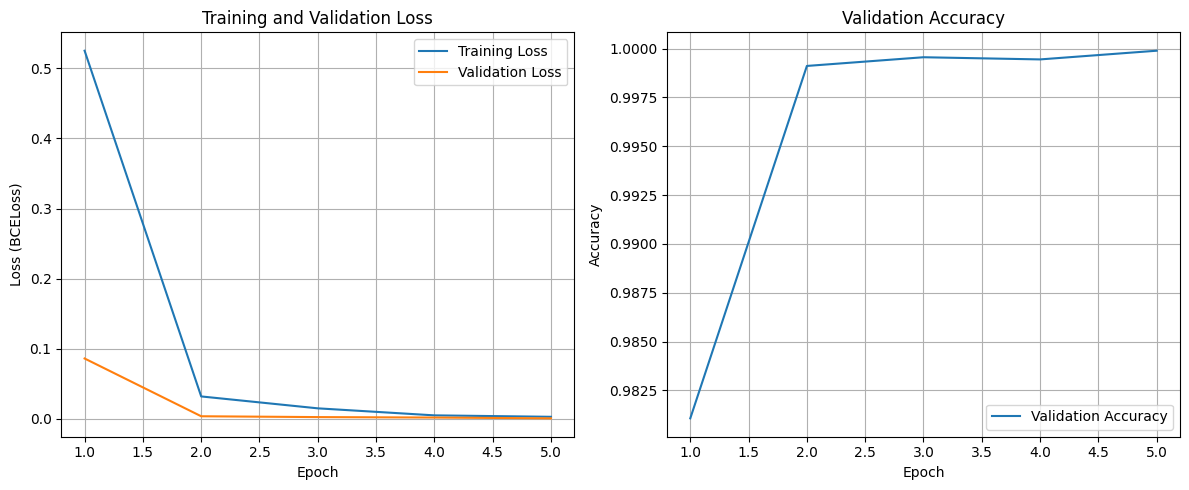

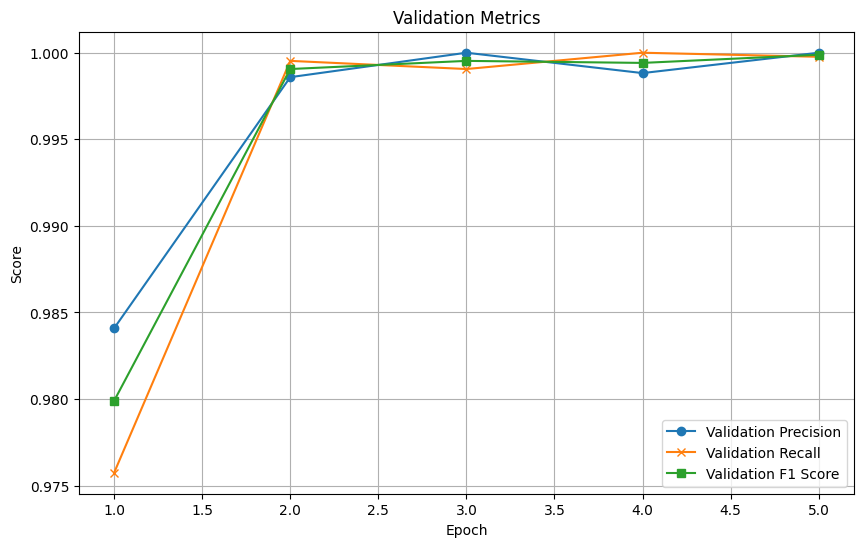

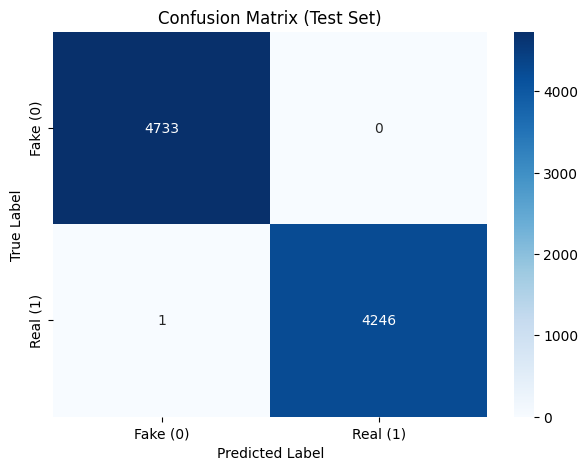

In [84]:
# Module 3: Plotting and Insights
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

epochs_range = range(1, NUM_EPOCHS + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history['train_loss'], label='Training Loss')
plt.plot(epochs_range, history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (BCELoss)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Precision, Recall, F1 Score
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, history['val_precision'], label='Validation Precision', marker='o')
plt.plot(epochs_range, history['val_recall'], label='Validation Recall', marker='x')
plt.plot(epochs_range, history['val_f1'], label='Validation F1 Score', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix using predictions from the last validation epoch
cm = confusion_matrix(all_labels, binary_preds)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Fake (0)', 'Real (1)'],
            yticklabels=['Fake (0)', 'Real (1)'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
